# <center> 🏎️ Formula 1 Race Prediction </center>

<img src="https://i.ytimg.com/vi/y42PI9peurI/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLDYDLVaNMpCBv5PTN7xtqNCLGmabg" width="1080" height="400">

## 0. Introduction

**Formula 1** (a.k.a. F1 or Formula One) is the pinnacle of motorsport — a high-stakes arena where elite drivers, cutting-edge engineering, and team strategies collide at over 300 km/h. But beyond the spectacle of roaring engines and burning rubber lies a treasure trove of data: lap times, pit stop strategies, qualifying positions, historical performance, and more.

In this project, we aim to harness the power of historical Formula 1 data to answer a deceptively simple question:

> **Can we predict whether a driver will finish a race in the top 3 (i.e., on the podium)?**

By approaching this task as a binary classification problem, we will explore how various features — including driver performance, constructor capabilities, track specifics, and qualifying results — contribute to race-day success.

---
### Key F1 terminology 

To ensure clarity for all readers, here’s a brief overview of essential Formula 1 terms referenced throughout this project:

- **Driver** — The individual competing in the race. Each F1 team has two drivers.
- **Constructor (Team)** — The organization that builds and races the car. Examples: Mercedes, Ferrari, Red Bull Racing.
- **Grand Prix (Race)** — A single event in the F1 calendar, typically held over a weekend, consisting of practice sessions, qualifying, and the main race.
- **Qualifying** — A session that determines the starting grid for the race. A better qualifying position often improves race performance.
- **Podium** — The top 3 finishers in a race — 1st, 2nd, and 3rd place. These are the drivers who physically stand on the podium after the race and receive trophies.
- **Pole Position** — The first position on the starting grid, awarded to the fastest qualifier.
- **Pit Stop** — When a driver enters the pit lane to change tyres or fix minor issues. Time-consuming, but sometimes strategically vital. The pit stop itself ideally takes 2-3 seconds, but the whole process of entering and exiting the pits lasts about 20-25 seconds.
- **DNF (Did Not Finish)** — When a driver does not complete the race due to a crash, mechanical failure, or other issue.
- **DRS (Drag Reduction System)** — A mechanism that allows drivers to reduce aerodynamic drag and gain speed when overtaking (if within 1 second of the car ahead).
- **Fastest Lap** — The single quickest lap during a race, used to bring the driver extra points up until the 2025 rules' changes.
- **Constructor Standings** — A championship ranking of teams based on their drivers’ collective performance.
- **Driver Standings** — The points-based leaderboard for individual drivers across the season.

These concepts are embedded in both the raw data and the feature engineering used in the model, so understanding them is crucial for interpreting our analysis and results.

---

### Problem Statement

The goal of this project is to build a machine learning model that predicts whether a Formula 1 driver will finish in the **top 3 positions** in a given race, based on historical data. Specifically, we will:

- Create a labeled dataset where the target variable is whether a driver finishes in position **1**, **2**, or **3**.
- Engineer meaningful features from multiple datasets (results, qualifying, circuits, constructors, drivers, pit stops, etc.).
- Train and evaluate various classification models.
- Analyze the importance of different features in predicting podium finishes.
- Assess model performance using metrics such as **precision**, **recall**, **F1-score**, and **ROC-AUC**.

---

###  Data Sources

The dataset consists of several CSV files that contain detailed information about Formula 1 races from past seasons. These include:

- `drivers.csv` — Driver profiles and career data  
- `constructors.csv` — Team (constructor) information  
- `races.csv` — Information about each Grand Prix, including date and location  
- `results.csv` — Final race results for each driver  
- `qualifying.csv` — Qualifying session results  
- `pit_stops.csv` — Timing and number of pit stops per race  
- `status.csv` etc.

Together, these files allow for a comprehensive view of each race weekend and driver’s season performance.

---

###  Methodology

The project workflow consists of the following steps:

1. **Data Loading and Initial Exploration**  
   Import all relevant CSVs and perform initial inspections.

2. **Data Cleaning and Preprocessing**  
   Handle missing values, unify formats, and merge tables as necessary.

3. **Exploratory Data Analysis (EDA)**  
   Understand distributions, correlations, and identify key performance patterns.

4. **Feature Engineering**  
   Create new features such as:
   - Average finishing position
   - Constructor's recent performance
   - Driver’s podium rate
   - Track-specific experience etc.

5. **Target Variable Definition**  
   Encode the target variable as `1` if the driver finishes **1st**, **2nd**, or **3rd**, and `0` otherwise.

6. **Train-Test Split**  
   Split the dataset into training and test sets using stratified sampling.

7. **Model Selection and Training**  
   Test multiple models including:
   - Logistic Regression (as a baseline)
   - Random Forest
   - Gradient Boosting (XGBoost, LightGBM) and others.

8. **Evaluation and Tuning**  
   Use confusion matrices, ROC curves, and f1-score to assess performance.

9. **Interpretation**  
   Analyze feature importances to understand what drives podium finishes.

10. **Conclusion and Future Work**  
   Summarize findings, discuss limitations, and suggest improvements.

---

###  Why This Matters

Predicting top finishes in Formula 1 is not just an academic exercise — it has real-world applications:

- **Teams** can fine-tune strategy and evaluate driver performance.
- **Fans** can gain deeper insights into race dynamics and outcomes.
- **Bookmakers** and analysts can enhance betting models and predictions.
- **Engineers** and data scientists can explore real-time analytics applications during live races.

By combining sports analytics and machine learning, this project offers a fascinating glimpse into how data can decode the chaos of high-speed competition.

---

###  Final Thoughts

F1 is unpredictable. Safety cars, weather, crashes, and human error make every race unique. But if there’s one thing data science teaches us, it’s that even the most chaotic systems often follow patterns — you just need to look closely enough.

Now, let’s see if we can find them. It's lights out and away we go! 🏁🏎️


## 1. Data loading and initial exploration

First, let's load all the necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, f_oneway
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import warnings
import requests
from datetime import datetime
import time
from tqdm import tqdm
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import ADASYN
import optuna
warnings.filterwarnings('ignore')
import random
import numpy as np
import os
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import joblib
from nyoka import skl_to_pmml
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
set_seed(42)
random_state = 42

It's time to load the data!

In [5]:
circuits = pd.read_csv('data/circuits.csv').rename(columns={'name': 'circuit'})
constructors = pd.read_csv('data/constructors.csv').rename(columns={'name': 'constructor'})
drivers = pd.read_csv('data/drivers.csv')
qualifying = pd.read_csv('data/qualifying.csv')
races = pd.read_csv('data/races.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')

source: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [6]:
pitstops = pd.read_csv('data/pit_stops_1950_2024.csv')

source: https://www.kaggle.com/datasets/akashrane2609/formula-1-pit-stop-dataset

Now let's merge the datasets into a single df using linking keys and keeping only relevant columns:

In [7]:
# Merge to create the base dataset
merged = results \
    .merge(races[['raceId', 'year', 'round', 'circuitId']], on='raceId', how='left') \
    .merge(circuits[['circuitId', 'circuit']], on='circuitId', how='left') \
    .merge(drivers[['driverId', 'surname']], on='driverId', how='left') \
    .merge(constructors[['constructorId', 'constructor']], on='constructorId', how='left') \
    .merge(qualifying[['raceId', 'driverId', 'constructorId', 'position']], on=['raceId', 'driverId', 'constructorId'], how='left') \
    .merge(status, on='statusId', how='left')

# Rename columns for clarity
merged = merged.rename(columns={
    'surname': 'driver',
    'name_constructor': 'constructor',
    'position_x': 'finish_pos',
    'position_y': 'quali_pos'
})

# Select relevant columns
df = merged[[
    'raceId', 'driverId', 'year', 'round', 'circuit', 'driver', 'constructor',
    'grid', 'quali_pos', 'points', 'finish_pos', 'status'
]]

# Drop rows with critical missing values 
# (we're not including finishing position since missing values there could be indication of non-finishers)
df = df.dropna(subset=['driver', 'constructor'])
# Create a copy for future use
df_raw = df.copy()

# Show a preview
df.head(5)

,raceId,driverId,year,round,circuit,driver,constructor,grid,quali_pos,points,finish_pos,status
0,18,1,2008,1,Albert Park Grand Prix Circuit,Hamilton,McLaren,1,1.0,10.0,1,Finished
1,18,2,2008,1,Albert Park Grand Prix Circuit,Heidfeld,BMW Sauber,5,5.0,8.0,2,Finished
2,18,3,2008,1,Albert Park Grand Prix Circuit,Rosberg,Williams,7,7.0,6.0,3,Finished
3,18,4,2008,1,Albert Park Grand Prix Circuit,Alonso,Renault,11,12.0,5.0,4,Finished
4,18,5,2008,1,Albert Park Grand Prix Circuit,Kovalainen,McLaren,3,3.0,4.0,5,Finished


In order to merge our dataset with the pit stops dataset we need to check the compatability first:

In [8]:
# Step 1: Analyze compatibility
def analyze_merge_compatibility(df, pitstops):
    """
    Analyze potential merge issues between the two datasets
    
    Args:
        df (pd.DataFrame): Main dataset
        pitstops (pd.DataFrame): Pitstops dataset
    
    Returns:
        None
    """
    print("=== MERGE COMPATIBILITY ANALYSIS ===\n")
    
    # 1. Check year/season overlap
    main_years = set(df['year'].unique())
    pitstop_years = set(pitstops['Season'].unique())
    overlap_years = main_years.intersection(pitstop_years)
    
    print(f"Main dataset years: {min(main_years)} - {max(main_years)}")
    print(f"Pitstops dataset years: {min(pitstop_years)} - {max(pitstop_years)}")
    print(f"Overlapping years: {len(overlap_years)} years\n")
    
    # 2. Check circuit name consistency
    main_circuits = set(df['circuit'].unique())
    pitstop_circuits = set(pitstops['Circuit'].unique())
    
    print(f"Circuits in main dataset: {len(main_circuits)}")
    print(f"Circuits in pitstops dataset: {len(pitstop_circuits)}")
    print(f"Common circuits: {len(main_circuits.intersection(pitstop_circuits))}")
    
    # Show some circuit name examples for comparison
    print(f"\nSample main dataset circuits:")
    for circuit in list(main_circuits)[:5]:
        print(f"  - {circuit}")
    
    print(f"\nSample pitstops dataset circuits:")
    for circuit in list(pitstop_circuits)[:5]:
        print(f"  - {circuit}")
    
    # 3. Check driver name consistency
    main_drivers = set(df['driver'].unique())
    pitstop_drivers = set(pitstops['Driver'].unique())
    
    print(f"\nDrivers in main dataset: {len(main_drivers)}")
    print(f"Drivers in pitstops dataset: {len(pitstop_drivers)}")
    print(f"Common drivers: {len(main_drivers.intersection(pitstop_drivers))}")
    
    # 4. Check constructor consistency
    main_constructors = set(df['constructor'].unique())
    pitstop_constructors = set(pitstops['Constructor'].unique())
    
    print(f"\nConstructors in main dataset: {len(main_constructors)}")
    print(f"Constructors in pitstops dataset: {len(pitstop_constructors)}")
    print(f"Common constructors: {len(main_constructors.intersection(pitstop_constructors))}")

analyze_merge_compatibility(df, pitstops)


=== MERGE COMPATIBILITY ANALYSIS ===

Main dataset years: 1950 - 2024
Pitstops dataset years: 1950 - 2024
Overlapping years: 75 years

Circuits in main dataset: 77
Circuits in pitstops dataset: 77
Common circuits: 69

Sample main dataset circuits:
  - Nürburgring
  - Kyalami
  - Zeltweg
  - Mosport International Raceway
  - Monsanto Park Circuit

Sample pitstops dataset circuits:
  - Kyalami
  - Zeltweg
  - Mosport International Raceway
  - Monsanto Park Circuit
  - Rouen-Les-Essarts

Drivers in main dataset: 802
Drivers in pitstops dataset: 861
Common drivers: 0

Constructors in main dataset: 211
Constructors in pitstops dataset: 211
Common constructors: 211


Ow well that's not pretty! We've got to work on those circuits and drivers columns

In [9]:
def clean_and_merge_datasets(main_df, pitstops_df):
    """
    Clean and merge the datasets with proper handling of inconsistencies
    
    Args:
        main_df (pd.DataFrame): Main dataset
        pitstops_df (pd.DataFrame): Pitstops dataset
    
    Returns:
        merged_df (pd.DataFrame): Merged dataset
    """
    print("=== CLEANING AND MERGING ===\n")
    
    # Creating copies to avoid modifying originals
    main_clean = main_df.copy()
    pitstops_clean = pitstops_df.copy()
    
    # Renaming columns in pitstops dataset to match main dataset
    pitstops_clean = pitstops_clean.rename(columns={
        'Season': 'year',
        'Round': 'round',
        'Circuit': 'circuit',
        'Driver': 'driver',
        'Constructor': 'constructor'
    })
    
    # Fixing character encoding issues in pitstops dataset

    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã¡', 'á', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã©', 'é', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã­', 'í', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã³', 'ó', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ãº', 'ú', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã±', 'ñ', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã§', 'ç', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã¼', 'ü', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã¶', 'ö', regex=False)
    pitstops_clean['circuit'] = pitstops_clean['circuit'].str.replace('Ã¤', 'ä', regex=False)
    
    # Fixing driver name format differences
    # The main dataset uses surnames only, pitstops uses full names
    # We need to extract surnames from the pitstops dataset
    
    def extract_surname(full_name):
        """Extract surname from full name"""
        if pd.isna(full_name):
            return full_name
        
        # Common F1 name patterns
        name_parts = str(full_name).strip().split()
        
        # Handle special cases
        if len(name_parts) == 1:
            return name_parts[0]
        elif len(name_parts) >= 2:
            # Usually the last part is the surname
            return name_parts[-1]
        else:
            return full_name
        
    pitstops_clean['driver'] = pitstops_clean['driver'].apply(extract_surname)
    
    # Fix character encoding issues in pitstops dataset
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã¡', 'á', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã©', 'é', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã­', 'í', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã³', 'ó', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ãº', 'ú', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã±', 'ñ', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã§', 'ç', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã¼', 'ü', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã¶', 'ö', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã¤', 'ä', regex=False)
    pitstops_clean['driver'] = pitstops_clean['driver'].str.replace('Ã‰', 'é', regex=False)
    
    pitstops_merge = pitstops_clean[['year', 'round', 'circuit', 'driver', 'constructor', 
                                   'TotalPitStops']].copy()
    
    # Renaming
    pitstops_merge = pitstops_merge.rename(columns={
        'TotalPitStops': 'total_pit_stops',
    })
    
    # Performing the merge
    print("Performing merge...\n")
    merged_df = main_clean.merge(
        pitstops_merge,
        on=['year', 'round', 'circuit', 'driver', 'constructor'],
        how='left',  # Keeping all records from main dataset
        indicator=True  # This will show which records matched
    )
    
    print('All done!')
    
    return merged_df


# Performing merge 
df = clean_and_merge_datasets(df, pitstops)



=== CLEANING AND MERGING ===

Performing merge...

All done!


In [10]:
df.shape

(26937, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26937 entries, 0 to 26936
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   raceId           26937 non-null  int64   
 1   driverId         26937 non-null  int64   
 2   year             26937 non-null  int64   
 3   round            26937 non-null  int64   
 4   circuit          26937 non-null  object  
 5   driver           26937 non-null  object  
 6   constructor      26937 non-null  object  
 7   grid             26937 non-null  int64   
 8   quali_pos        10484 non-null  float64 
 9   points           26937 non-null  float64 
 10  finish_pos       26937 non-null  object  
 11  status           26937 non-null  object  
 12  total_pit_stops  25885 non-null  float64 
 13  _merge           26937 non-null  category
dtypes: category(1), float64(3), int64(5), object(5)
memory usage: 2.7+ MB


Let's look at some stats, shall we?

In [12]:
df.describe()

,raceId,driverId,year,round,grid,quali_pos,points,total_pit_stops
count,26937.000000,26937.000000,26937.000000,26937.000000,26937.000000,10484.000000,26937.000000,25885.000000
mean,553.215280,280.405650,1991.160634,8.479304,11.126258,11.188668,1.978822,0.430288
std,312.819642,282.688169,20.096415,5.072546,7.206539,6.259034,4.339757,0.947335
min,1.000000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,302.000000,58.000000,1976.000000,4.000000,5.000000,6.000000,0.000000,0.000000
50%,534.000000,172.000000,1991.000000,8.000000,11.000000,11.000000,0.000000,0.000000
75%,810.000000,404.000000,2009.000000,12.000000,17.000000,16.000000,2.000000,0.000000
max,1144.000000,862.000000,2024.000000,24.000000,34.000000,28.000000,50.000000,7.000000


In [13]:
df.describe(include='object')

,circuit,driver,constructor,finish_pos,status
count,26937,26937,26937,26937,26937
unique,77,802,211,34,137
top,Autodromo Nazionale di Monza,Schumacher,Ferrari,\N,Finished
freq,1854,532,2483,11047,7702


## 2. Data cleaning and preprocessing

In [14]:
# Getting rid of all the duplicates if there are any
df = df.drop_duplicates()

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

raceId                 0
driverId               0
year                   0
round                  0
circuit                0
driver                 0
constructor            0
grid                   0
quali_pos          16275
points                 0
finish_pos             0
status                 0
total_pit_stops     1052
_merge                 0
dtype: int64

Let's start with the easy ones - missing values in the qualifying position column. To fill the gaps there we can use the grid column, since they're roughly the same thing (a driver's grid position is his quali position after penalties if he gets any (e.g., at the 2025 Monaco GP L.Hamilton qualified forth, but was dropped down to seventh position after receiving a three-place grid penalty for impeding)). So:

In [16]:
df['quali_pos'] = df['quali_pos'].fillna(df['grid'])

To fill some of the missing values in the total_pit_stops we can use the pit_stops dataset that contains pit stop data from 2011-2024:

In [17]:
pit_stops = pd.read_csv('data/pit_stops.csv')
df = df.merge(pit_stops.groupby(['raceId', 'driverId']).size().reset_index(name='pit_stops'), on=['raceId', 'driverId'], how='left') 
df.tail(5)

,raceId,driverId,year,round,circuit,driver,constructor,grid,quali_pos,points,finish_pos,status,total_pit_stops,_merge,pit_stops
26754,1144,825,2024,24,Yas Marina Circuit,Magnussen,Haas F1 Team,14,15.0,0.0,16,+1 Lap,4.0,both,4.0
26755,1144,859,2024,24,Yas Marina Circuit,Lawson,RB F1 Team,12,12.0,0.0,17,Engine,3.0,both,3.0
26756,1144,822,2024,24,Yas Marina Circuit,Bottas,Sauber,9,9.0,0.0,\N,Collision damage,1.0,both,1.0
26757,1144,861,2024,24,Yas Marina Circuit,Colapinto,Williams,20,19.0,0.0,\N,Engine,1.0,both,1.0
26758,1144,815,2024,24,Yas Marina Circuit,Pérez,Red Bull,10,10.0,0.0,\N,Collision,0.0,both,NaN


In [18]:
# Fill in missing values
df['total_pit_stops'] = df['total_pit_stops'].fillna(df['pit_stops'])
df.drop(columns=['pit_stops', '_merge'], inplace=True)

In [19]:
# Check for missing values
missing_values = df[['total_pit_stops', 'quali_pos']].isnull().sum()
missing_values

total_pit_stops    950
quali_pos            0
dtype: int64

We've reduced the number of missing values in the total_pit_stops by 102, which is not bad! And as for the rest of them...:

In [20]:
# Filling in the missing values with median
df['total_pit_stops'] = df.groupby(['year'])['total_pit_stops'] \
    .transform(lambda x: x.fillna(x.median()))

In [21]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

raceId             0
driverId           0
year               0
round              0
circuit            0
driver             0
constructor        0
grid               0
quali_pos          0
points             0
finish_pos         0
status             0
total_pit_stops    0
dtype: int64

Great!

Let's fix the 'finish_to_pos' column:

In [22]:
# Convert '\N' in finish_pos to np.nan for handling non-finishers
df['finish_pos'] = df['finish_pos'].apply(lambda x: np.nan if x == '\\N' else x)

To penalize the drivers who DNFed, we will assign to them a finishing position that is equal to grid size + 2:

In [23]:
# Calculate the actual grid size (number of starters) for each race
def calculate_race_grid_size(df):
    """
    Calculate the actual grid size (number of starters) for each race.
    This helps determine appropriate DNF penalties.
    
    Args:
        df (pd.DataFrame): DataFrame with F1 race data.
    
    Returns:
        df_with_grid (pd.DataFrame): DataFrame with an additional 'grid_size' column indicating the number of unique drivers per race.
    """
    # Group by race and count unique drivers
    race_grid_sizes = df.groupby('raceId')['driverId'].nunique().reset_index()
    race_grid_sizes.columns = ['raceId', 'grid_size']
    
    # Merge back to main dataframe
    df_with_grid = df.merge(race_grid_sizes, on='raceId', how='left')
    return df_with_grid

# Calculate dynamic DNF penalty based on grid size.
def get_dynamic_dnf_penalty(grid_size, penalty_type='last_plus_2'):
    """
    Calculate dynamic DNF penalty based on grid size.
    
    Args:
        grid_size (int64): Number of cars that started the race
        penalty_type (str): Type of penalty calculation
            - 'last_plus_1': Grid size + 1 (one position worse than last)
            - 'last_plus_2': Grid size + 2 (two positions worse than last) 
            - 'last_plus_percentile': Grid size + 10% of grid size
            - 'fixed_percentile': 90th percentile of grid (grid_size * 0.9)
    
    Returns:
        Penalty position for DNFs
    """
    if penalty_type == 'last_plus_1':
        return grid_size + 1
    elif penalty_type == 'last_plus_2':
        return grid_size + 2
    elif penalty_type == 'last_plus_percentile':
        return int(grid_size + (grid_size * 0.1))
    elif penalty_type == 'fixed_percentile':
        return int(grid_size * 0.9)
    else:
        return grid_size + 2  # Default

df = calculate_race_grid_size(df)
df['finish_pos'] = df['finish_pos'].fillna(get_dynamic_dnf_penalty(df['grid_size'], penalty_type='last_plus_2'))

In [24]:
# Create a binary target variable for top 3 finishes (1 for top 3, 0 otherwise)
df['podium'] = df['finish_pos'].astype(int).apply(lambda x: 1 if x <= 3 else 0)

In [25]:
# Create a binary target variable for podium finishes for future use
df_raw['podium'] = df_raw['finish_pos'].apply(lambda x: 1 if x in ['1', '2', '3'] else 0) 

Let's move on to EDA!

## 3. EDA

### Class Balance Check

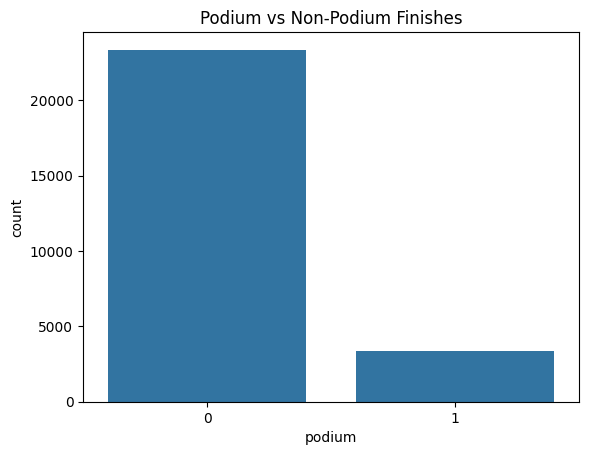

podium
0    0.873089
1    0.126911
Name: proportion, dtype: float64


In [26]:
sns.countplot(data=df, x='podium')
plt.title('Podium vs Non-Podium Finishes')
plt.show()

print(df['podium'].value_counts(normalize=True))

That is a clear class imbalance so we're essentially training our model to find rare gems in a pile of gravel. If we're not careful, it’ll just predict “not podium” all the time and still look smugly accurate ~87% of the time — utterly useless. This means that during our model evaluation we will need to look at precision, recall, and F1-score, not just accuracy. We can also use ROC-AUC and PR-AUC to evaluate models. 

### Feature Distributions

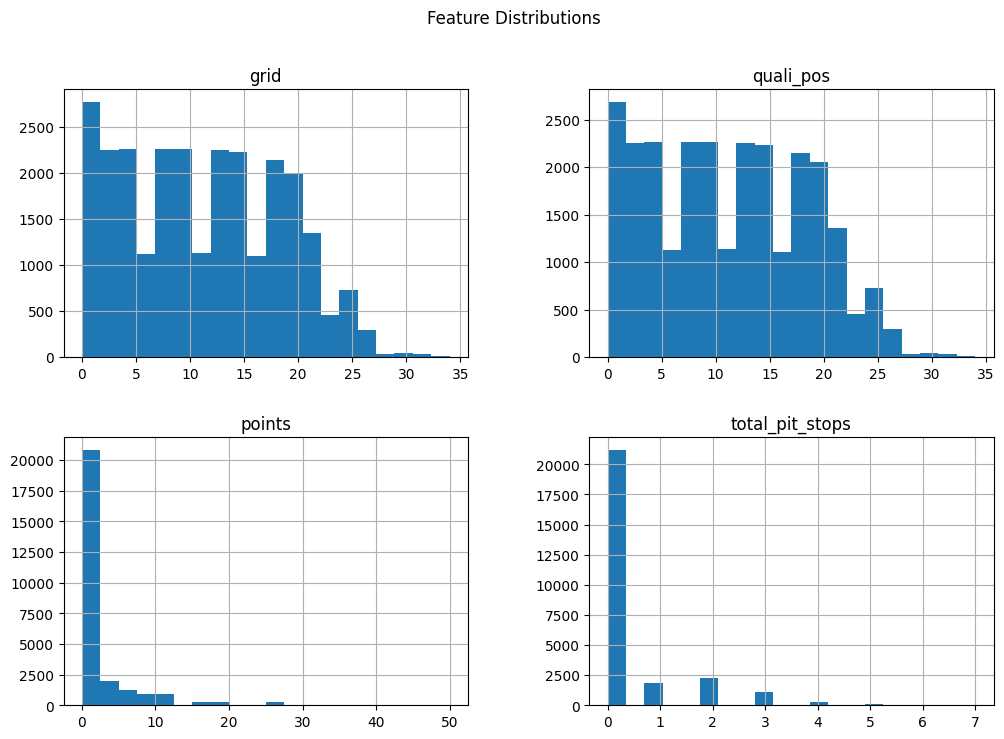

In [27]:
df[['grid', 'quali_pos', 'points', 'total_pit_stops']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions')
plt.show()

**grid and quali_pos:**

Both are slightly right-skewed, as expected — in most seasons there are only 20-22 drivers. 

Few outliers starting very far back — probably due to differences in the rules during different seasons.

**total amount of pit stops:**

Mostly 0–2. Higher values are rarer — possibly wet races or chaos-fueled pit strategies.
Since keeping this column would be considered information leakage, I suggest transforming it into a column with the info about the median amount of pit stops for this driver at this track, but it's a bit too early for that now, we'll get to it during feature engineering

**points**:

Heavily skewed to the left — most drivers get 0, a few get a lot.

Makes sense: only top 10 get points in modern F1. Also, the points system has changed a lot since the start of Formula 1 in 1950, so in order for everything to be fair and square, we should recalculate the points in our df accordingly to the modern points system and we'll do so after we're done with EDA.

### Top 10 Constructors by Podium Finishes

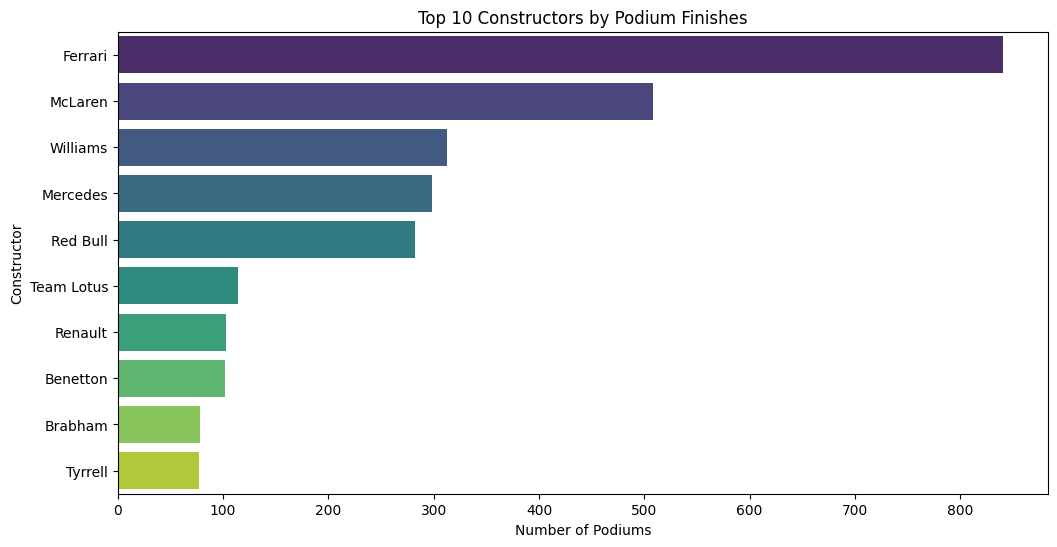

In [28]:
# Podium finishes by constructor (Top 10)
plt.figure(figsize=(12, 6))
top_constructors = df[df['podium'] == 1]['constructor'].value_counts().head(10)
sns.barplot(x=top_constructors.values, y=top_constructors.index, palette='viridis')
plt.title('Top 10 Constructors by Podium Finishes')
plt.xlabel('Number of Podiums')
plt.ylabel('Constructor')
plt.show()

The plot below shows the number of podium finishes (top 3) by constructor (team), focusing on the top 10 teams in F1 history.

**Analysis:**
 - Ferrari is the clear leader in podium finishes, reflecting its long history and consistent competitiveness in Formula 1.
 - McLaren, Williams, Mercedes, and Red Bull follow, each with a significant number of podiums, highlighting their eras of dominance.
 - The remaining teams (Team Lotus, Renault, Benetton, Brabham, Tyrrell) were highly successful in specific periods but are less prominent in recent years.
 - The distribution shows that a small number of teams account for the majority of podiums, indicating a strong competitive imbalance in F1, where top teams dominate results.
 - This dominance by a few constructors is a key factor in predicting podium finishes, as team performance is highly correlated with success.

 In summary, the plot highlights the historical dominance of a handful of teams in achieving podium finishes in Formula 1.

### Distribution of grid positions for podium vs non-podium

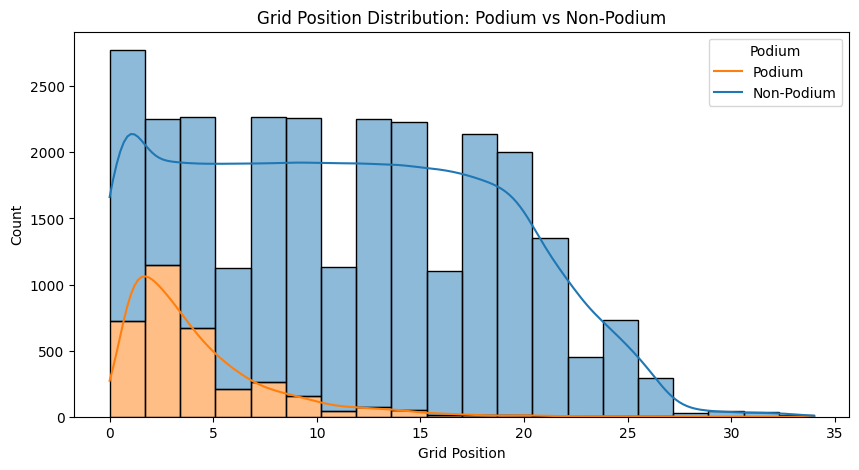

In [29]:
# Distribution of grid positions for podium vs non-podium
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='grid', hue='podium', bins=20, kde=True, multiple='stack')
plt.title('Grid Position Distribution: Podium vs Non-Podium')
plt.xlabel('Grid Position')
plt.ylabel('Count')
plt.legend(title='Podium', labels=['Podium', 'Non-Podium'])
plt.show()


The plot shows the distribution of grid positions for podium vs non-podium finishes.
 
 **Key observations:**

- Podium finishers (label 1) are heavily concentrated at the front of the grid (positions 1-6).
- Non-podium finishers (label 0) are spread across all grid positions, with a peak at the back (reflecting more drivers starting further back).
- The likelihood of a podium drops sharply as grid position increases.
- Very few podiums come from grid positions beyond 10, highlighting the importance of qualifying well.

This confirms that starting near the front is a strong predictor of finishing on the podium.

### Average points by year

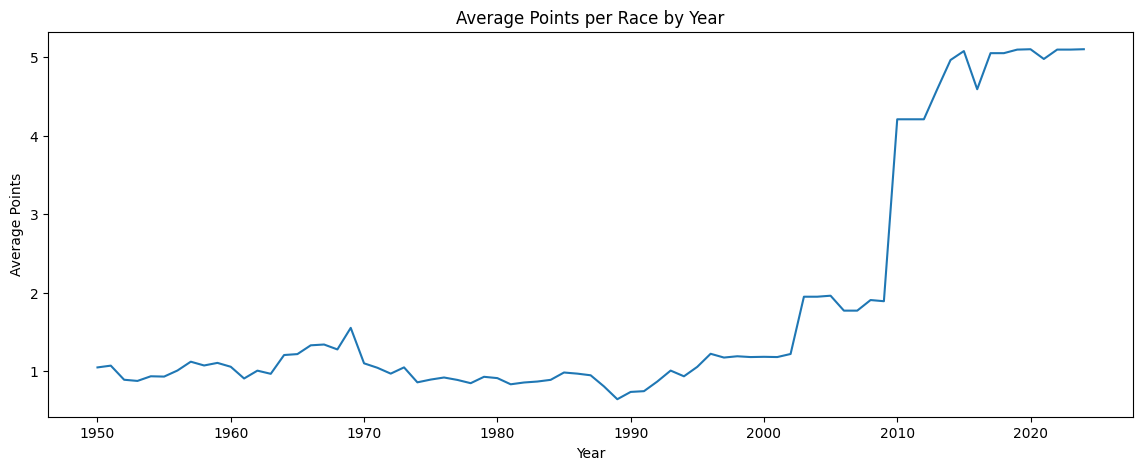

In [30]:
# Average points by year
plt.figure(figsize=(14, 5))
yearly_points = df.groupby('year')['points'].mean()
sns.lineplot(x=yearly_points.index, y=yearly_points.values)
plt.title('Average Points per Race by Year')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.show()


The plot shows the average points per race by year in Formula 1 history.

 **Analysis:**
 - There is a clear upward trend in average points starting from 2010, which aligns with the introduction of the current points system (25 points for a win, points for top 10).
 - Before 2010, the average points per race were lower and more variable, reflecting changes in the points system and the number of classified finishers.
 - Occasional dips and spikes may correspond to seasons with fewer races, changes in the number of finishers, or exceptional performances by dominant teams/drivers.
 - The plot highlights how rule changes (especially in 2010) significantly impacted the distribution of points, making direct comparisons across eras more challenging.
 - In recent years, the average points per race have stabilized, indicating a consistent application of the modern points system.

 In summary, the plot demonstrates the evolution of F1's scoring system and the importance of normalizing points when comparing driver or team performance across different eras.

### Top 10 drivers by total podium finishes (all time)

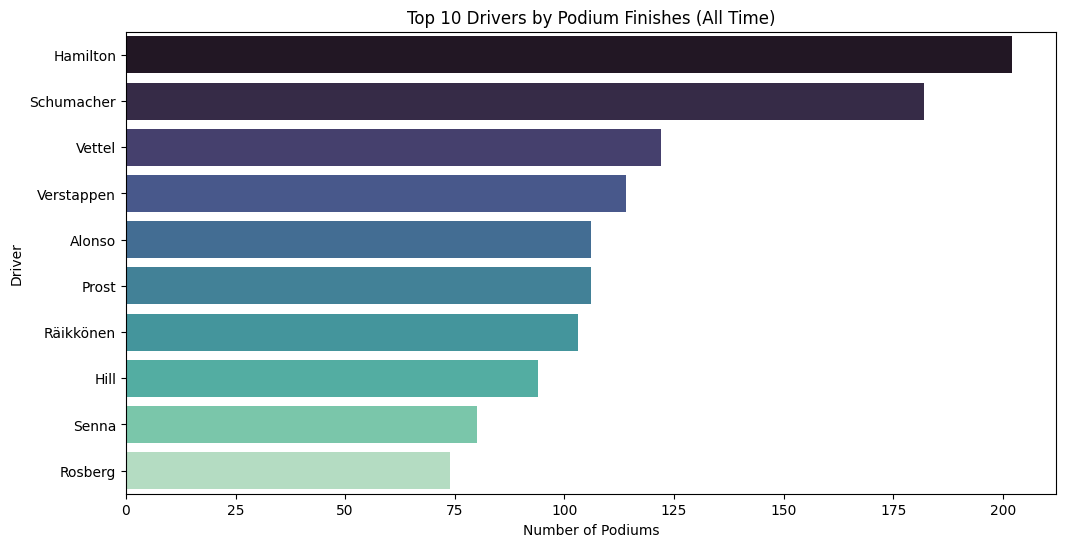

In [31]:
# Top 10 drivers by total podium finishes (all time)
top_drivers = df[df['podium'] == 1]['driver'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_drivers.values, y=top_drivers.index, palette='mako')
plt.title('Top 10 Drivers by Podium Finishes (All Time)')
plt.xlabel('Number of Podiums')
plt.ylabel('Driver')
plt.show()


The bar plot visualizes the top 10 Formula 1 drivers with the most podium finishes in history.

**Key observations:**
- Lewis Hamilton leads with the highest number of podiums, reflecting his dominance in the modern era.
- Michael Schumacher follows closely, highlighting his success during the 1990s and 2000s.
- Other modern-era drivers like Sebastian Vettel, Max Verstappen, and Nico Rosberg are also present, showing the impact of recent long careers and competitive machinery.
- Legendary drivers from previous decades, such as Fernando Alonso, Alain Prost, Kimi Räikkönen, Damon Hill and Ayrton Senna, round out the list.
- The distribution shows a mix of drivers from different eras, but recent drivers dominate due to longer seasons and more races per year.
- The gap between the top two (Hamilton and Schumacher, both are 7 time world champions) and the rest is significant, underlining their exceptional consistency and longevity.

**Conclusion**:
The plot highlights how a combination of talent, team performance, and career length contributes to podium success in Formula 1. It also reflects the evolution of the sport, with modern drivers having more opportunities to achieve podiums due to expanded race calendars.

### Circuits on world map

In [32]:
# Ensure latitude and longitude columns are present and not null
circuits_map = circuits.dropna(subset=['lat', 'lng'])

fig = px.scatter_geo(
    circuits_map,
    lat='lat',
    lon='lng',
    hover_name='circuit',
    projection='natural earth',
    title='World Map of Formula 1 Circuits',
    color_discrete_sequence=['red']
)
fig.update_traces(marker=dict(size=8))
fig.show()

The world map of Formula 1 circuits highlights the international nature of the sport, with venues spread across multiple continents. A few key observations emerge:

**1. Europe: The Historical Heartland**
Europe remains the most densely packed region for F1 circuits. This reflects the sport’s origins and historical development, with iconic venues like Silverstone (UK), Monza (Italy), Spa-Francorchamps (Belgium), and the Nürburgring (Germany). The proximity of circuits in Western and Central Europe indicates a strong motorsport culture and longstanding fan base.

**2. Asia: A Growing Powerhouse**
Over the past two decades, there has been significant growth in Asia, with modern circuits appearing in China (Shanghai), Japan (Suzuka), Singapore (Marina Bay), UAE (Yas Marina), and more recently Saudi Arabia and Qatar. These reflect Formula 1’s expansion strategy toward emerging markets with high commercial potential.

**3. Americas: Diverse Presence**
North and South America host several established circuits, including Circuit of the Americas (USA), Interlagos (Brazil), and Autódromo Hermanos Rodríguez (Mexico). The USA in particular has seen a resurgence, now boasting multiple races (Miami, Las Vegas, Austin), underscoring Liberty Media’s push to deepen F1's footprint in the US.

**4. Middle East: Modern Engineering Marvels**
The Middle East has become a key region, not only for hosting early- and late-season races but also for its state-of-the-art circuits, like Yas Marina and Jeddah. These races are often part of long-term contracts reflecting the region’s investment in motorsport infrastructure.

**5. Underrepresented Regions**
Africa is notably absent from the current calendar, with Kyalami (South Africa) and Prince George Circuit (South Africa) being the only historic venues. Similarly, Oceania is represented solely by the Melbourne Grand Prix and The Adelaide Street Circuit, which is a temporary street circuit, making them some of the most geographically isolated events on the calendar.

**Final Thoughts**
The map not only shows where F1 has raced, but also hints at its strategic priorities — moving from its European roots to a more commercially diversified, global series. This spatial distribution can be correlated with other variables like time zone diversity, logistical complexity, and regional audience reach — great angles for deeper analysis.

### Statistical Testing


 Chi-Squared Tests (Categorical vs. Target)

circuit: p = 0.99996
driver: p = 0.00000
constructor: p = 0.00000
finish_pos: p = 0.00000
status: p = 0.00000

 Numerical Feature Tests (0 vs. 1 in Target)

raceId: Mann-Whitney p = 0.00328
driverId: Mann-Whitney p = 0.00000
year: Mann-Whitney p = 0.00020
round: Mann-Whitney p = 0.86408
grid: Mann-Whitney p = 0.00000
quali_pos: Mann-Whitney p = 0.00000
points: Mann-Whitney p = 0.00000
total_pit_stops: Mann-Whitney p = 0.00000
grid_size: Mann-Whitney p = 0.00000

 Adjusted p-values (Benjamini-Hochberg FDR control):
raceId: adj. p = 0.00383 → Significant
driverId: adj. p = 0.00000 → Significant
year: adj. p = 0.00026 → Significant
round: adj. p = 0.93055 → Not Sig.
grid: adj. p = 0.00000 → Significant
quali_pos: adj. p = 0.00000 → Significant
points: adj. p = 0.00000 → Significant
total_pit_stops: adj. p = 0.00000 → Significant
grid_size: adj. p = 0.00000 → Significant
circuit: adj. p = 0.99996 → Not Sig.
driver: adj. p = 0.00000 → Significan

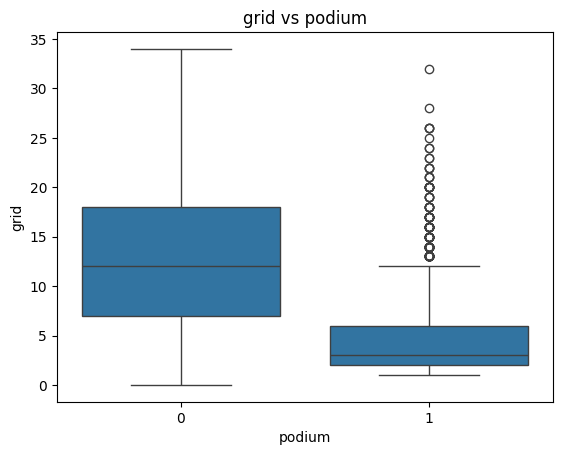

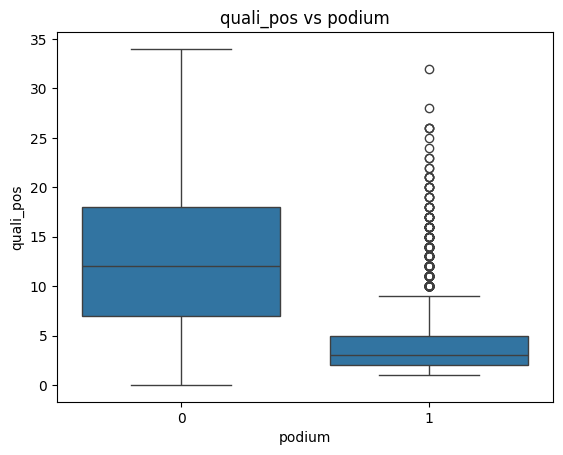

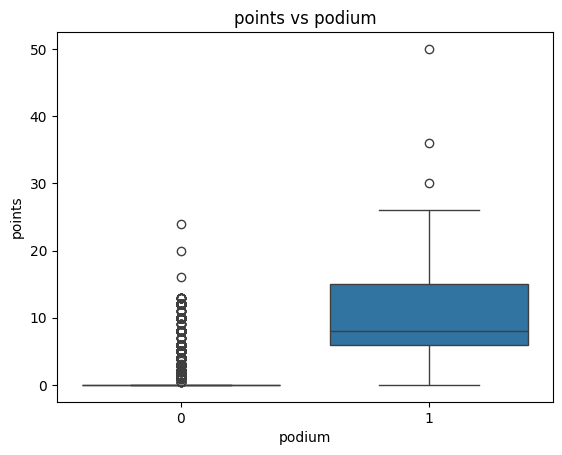

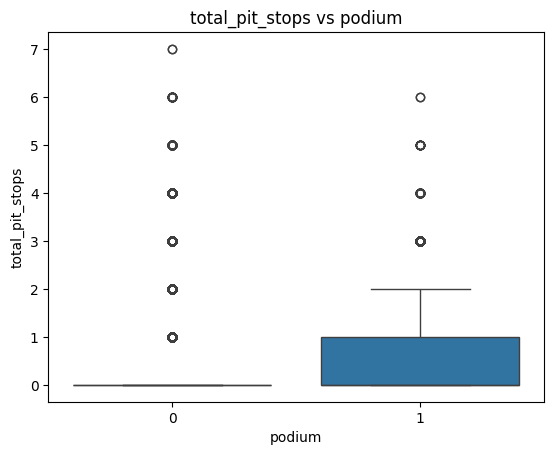

In [33]:
# Binary target
target = 'podium'

# Separate numeric and categorical features
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=[target]).columns.tolist()

# --- 1. Chi-Squared Test for Categorical Features ---
print("\n Chi-Squared Tests (Categorical vs. Target)\n")
chi2_results = []
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df[target])
    if contingency.shape[0] > 1:  # At least 2 levels
        chi2, p, _, _ = chi2_contingency(contingency)
        chi2_results.append((col, p))
        print(f"{col}: p = {p:.5f}")

# --- 2. T-Test / Mann-Whitney for Numerical Features ---
print("\n Numerical Feature Tests (0 vs. 1 in Target)\n")
ttest_results = []
for col in numerical_cols:
    group_0 = df[df[target] == 0][col].dropna()
    group_1 = df[df[target] == 1][col].dropna()
    
    # Using Mann-Whitney in case of non-normal distribution
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    ttest_results.append((col, p))
    print(f"{col}: Mann-Whitney p = {p:.5f}")

# --- 3. Multiple Testing Correction (Optional) ---
print("\n Adjusted p-values (Benjamini-Hochberg FDR control):")
all_pvals = [p for _, p in ttest_results + chi2_results]
rejected, adj_pvals, _, _ = multipletests(all_pvals, alpha=0.05, method='fdr_bh')

for (name, _), adj_p, reject in zip(ttest_results + chi2_results, adj_pvals, rejected):
    status = "Significant" if reject else "Not Sig."
    print(f"{name}: adj. p = {adj_p:.5f} → {status}")

# --- 4. Boxplots for Significant Numerical Features ---
significant_numeric = [name for (name, _), p, r in zip(ttest_results, adj_pvals, rejected) if r and name in numerical_cols]
significant_numeric.remove('year')
significant_numeric.remove('raceId')
significant_numeric.remove('driverId')
significant_numeric.remove('grid_size')
print("\n Boxplots of significant numeric features:\n")
for col in significant_numeric:
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs {target}")
    plt.show()


#### **Categorical Variables (Chi-Squared Tests)**
- **Circuit**: p ≈ 1.0 (not significant)  
  → This suggests that, on its own, the circuit name (as encoded) does not show a strong association with whether a driver finishes on the podium.
- **Driver and Constructor**: p ≈ 0.00000 (highly significant)  
  → Both driver and constructor identity are statistically associated with podium outcomes, meaning that who is driving and for which team matters a lot.
- **Finish Position and Status**: p ≈ 0.00000 (highly significant)  
  → While these variables might be considered outcome-related (or post-race information), if used carefully in a historical (pre-race) context, they have significant discriminatory power.

#### **Numerical Variables (Mann-Whitney U Tests)**
- **Race ID, Driver ID, Year, Grid, Quali Position, Points, Total Pit Stops, Grid Size** all have significant p-values (adj. p < 0.05) except for **Round** (p ≈ 0.93, not significant).  
  → This indicates that most of these features, which can be related to the race's context or the driver’s history, differ significantly between podium and non-podium finishes.
  - For example, **Grid and Quali Position** show strong differences; lower grid positions and better qualifying times are typically associated with podium finishes.
  - **Total Pit Stops** is also significant; however, caution is needed if using it for pre-race predictions (it may only be available post-race).

#### **Overall Implications for Feature Selection**
- Features like **driver, constructor, grid, quali_pos, points, total_pit_stops, and grid_size** are statistically significant and should be considered as important predictors.
- The **circuit** variable, however, does not show a significant direct relationship with podium outcomes in our tests. This does not mean it is useless—it might interact with other variables or contribute in an ensemble model—but on its own, it does not strongly discriminate between classes.
- **Round** appears not to be significant and might be dropped or combined with other temporal indicators.
- Note on **IDs (raceId, driverId)**: Although they are statistically significant, these are typically not used as predictors as they can capture artifact noise. Instead, we focus on performance-driven features derived from them (e.g., driver_race_count, rolling averages).

#### **Conclusion**
Based on these statistical tests, we will prioritize features such as **driver, constructor, grid, quali_pos, grid_size, and historical performance metrics** (e.g., driver_race_count, driver_avg_finish_pos_rolling) in our predictive model.  
For categorical variables with many levels (e.g., driver, constructor), careful encoding (such as binary encoding or target encoding) will be essential to reduce dimensionality while preserving the statistical signal.

These insights will serve as the basis for our feature selection and subsequent modeling efforts.


Let's move on to feature engineering!

## 4. Feature Engineering

### Modern Points

First, we shall recalculate all the points according to the modern points system:

In [34]:
# Convert finish positions to points based on modern F1 scoring system 
modern_points = {
    '1': 25, '2': 18, '3': 15, '4': 12, '5': 10,
    '6': 8, '7': 6, '8': 4, '9': 2, '10': 1
}

# Convert to string to match the keys in dict
df['points'] = df['finish_pos'].astype(str).map(modern_points).fillna(0).astype(int)

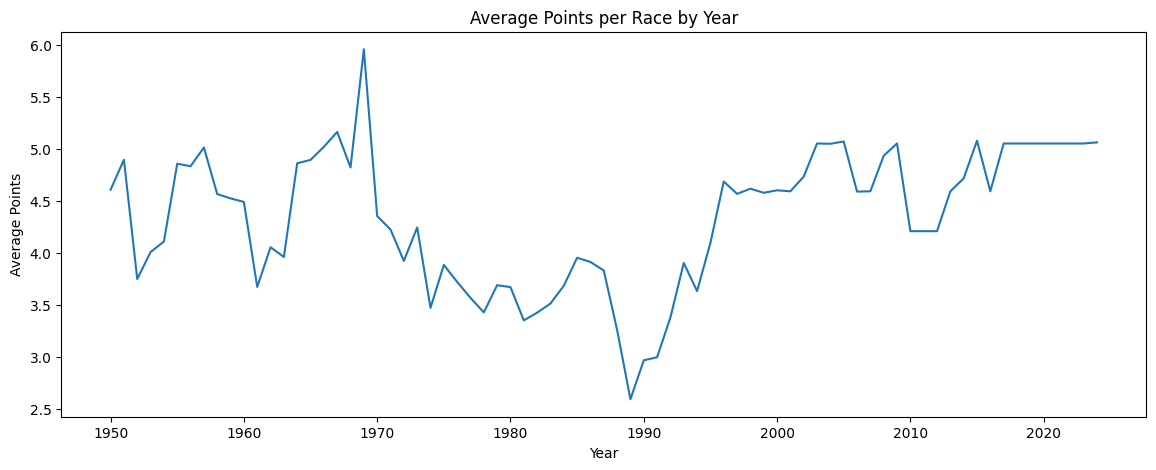

In [35]:
# Average points by year
plt.figure(figsize=(14, 5))
yearly_points = df.groupby('year')['points'].mean()
sns.lineplot(x=yearly_points.index, y=yearly_points.values)
plt.title('Average Points per Race by Year')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.show()


That's better!

### Starting Position

In [36]:
# Creating a binary feature for whether the driver started from the pole position 
df["pole"] = (df["grid"] == 1).astype(int)

# Creating a binary feature for whether the driver started in the top 10 grid positions
df["within_top10_grid"] = (df["grid"] <= 10).astype(int)

### Race Outcome

In [37]:
# Categorizing race outcomes based on status
finished_statuses = {'Finished'}
# Assuming lapped statuses are in the format '+X Laps' where X is a number
lapped_statuses = {f'+{i} Lap' if i == 1 else f'+{i} Laps' for i in range(1, 50)}  
def categorize_status(status):
    if status == 'Finished':
        return status
    elif status in lapped_statuses:
        return 'Lapped'
    else:
        return 'DNF'  

df['status'] = df['status'].apply(categorize_status)
df['status'].value_counts()

status
DNF         11598
Finished     7674
Lapped       7487
Name: count, dtype: int64

In [38]:
# Sorting the DataFrame by year, round, raceId, and finish position for chronological accuracy
df = df.sort_values(by=["year", "round", "driver"]).reset_index(drop=True)

### Constructor Family

In Formula 1, many teams undergo frequent rebranding or ownership changes while maintaining the same technical and operational core. For example, *BMW Sauber* became *Alfa Romeo*, and later *Kick Sauber*, yet they all represent the same racing team infrastructure.

To ensure consistency and reduce noise in our analysis and modeling, we normalize constructor names by mapping them to a unified "constructor family". This prevents the model from treating essentially the same team as multiple different entities due to name changes.

Below are a few examples:
- `BMW Sauber` → `Alfa Romeo` → `Kick Sauber` → `Sauber`
- `Toleman` → `Benetton` → `Lotus F1` → `Renault` → `Alpine F1 Team`
- `Minardi` → `Toro Rosso` → `AlphaTauri` → `VCARB F1 Team` → `Racing Bulls`
- `Jordan` → `Aston Martin` (through Midland, Spyker, Force India, and Racing Point)

This step helps improve model generalization and better captures team-level performance trends.

In [39]:
unique_constructors = {
    'AFM', 'AGS', 'ATS', 'Adams', 'Alfa Romeo', 'AlphaTauri', 'Alpine F1 Team', 'Alta', 'Amon', 'Andrea Moda',
    'Apollon', 'Arrows', 'Arzani-Volpini', 'Aston Butterworth', 'Aston Martin', 'BAR', 'BMW', 'BMW Sauber', 'BRM',
    'BRM-Ford', 'BRP', 'Behra-Porsche', 'Bellasi', 'Benetton', 'Boro', 'Brabham', 'Brabham-Alfa Romeo', 'Brabham-BRM',
    'Brabham-Climax', 'Brabham-Ford', 'Brabham-Repco', 'Brawn', 'Bromme', 'Bugatti', 'Caterham', 'Christensen',
    'Cisitalia', 'Coloni', 'Connaught', 'Connew', 'Cooper', 'Cooper-ATS', 'Cooper-Alfa Romeo', 'Cooper-BRM',
    'Cooper-Borgward', 'Cooper-Castellotti', 'Cooper-Climax', 'Cooper-Ferrari', 'Cooper-Ford', 'Cooper-Maserati',
    'Cooper-OSCA', 'Dallara', 'De Tomaso', 'De Tomaso-Alfa Romeo', 'De Tomaso-Ferrari', 'De Tomaso-Osca', 'Deidt',
    'Del Roy', 'Derrington', 'Dunn', 'EMW', 'ENB', 'ERA', 'Eagle-Climax', 'Eagle-Weslake', 'Elder', 'Embassy Hill',
    'Emeryson', 'Ensign', 'Epperly', 'Euro Brun', 'Ewing', 'Ferguson', 'Ferrari', 'Fittipaldi', 'Fondmetal',
    'Footwork', 'Force India', 'Forti', 'Frazer Nash', 'Fry', 'Gilby', 'Gordini', 'HRT', 'HWM', 'Haas F1 Team', 'Hall',
    'Hesketh', 'Honda', 'Iso Marlboro', 'JBW', 'Jaguar', 'Jordan', 'Kauhsen', 'Klenk', 'Kojima', 'Kurtis Kraft',
    'Kuzma', 'LDS', 'LDS-Alfa Romeo', 'LDS-Climax', 'LEC', 'Lambo', 'Lancia', 'Langley', 'Larrousse', 'Lesovsky',
    'Leyton House', 'Life', 'Ligier', 'Lola', 'Lotus', 'Lotus F1', 'Lotus-BRM', 'Lotus-Borgward', 'Lotus-Climax',
    'Lotus-Ford', 'Lotus-Maserati', 'Lotus-Pratt &amp; Whitney', 'Lyncar', 'MBM', 'MF1', 'Maki', 'Manor Marussia',
    'March', 'March-Alfa Romeo', 'March-Ford', 'Marchese', 'Martini', 'Marussia', 'Maserati', 'Matra', 'Matra-Ford',
    'McGuire', 'McLaren', 'McLaren-Alfa Romeo', 'McLaren-BRM', 'McLaren-Ford', 'McLaren-Serenissima', 'Mercedes',
    'Merzario', 'Meskowski', 'Milano', 'Minardi', 'Moore', 'Nichels', 'OSCA', 'Olson', 'Onyx', 'Osella', 'Pacific',
    'Pankratz', 'Parnelli', 'Pawl', 'Penske', 'Phillips', 'Politoys', 'Porsche', 'Prost', 'Protos', 'RAM', 'RB F1 Team',
    'RE', 'Racing Point', 'Rae', 'Rebaque', 'Red Bull', 'Renault', 'Rial', 'Sauber', 'Scarab', 'Schroeder', 'Scirocco',
    'Shadow', 'Shadow-Ford', 'Shadow-Matra', 'Shannon', 'Sherman', 'Simca', 'Simtek', 'Snowberger', 'Spirit',
    'Spyker', 'Spyker MF1', 'Stebro', 'Stevens', 'Stewart', 'Super Aguri', 'Surtees', 'Sutton', 'Talbot-Lago',
    'Team Lotus', 'Tec-Mec', 'Tecno', 'Theodore', 'Token', 'Toleman', 'Toro Rosso', 'Toyota', 'Trevis', 'Trojan',
    'Turner', 'Tyrrell', 'Vanwall', 'Veritas', 'Virgin', 'Watson', 'Wetteroth', 'Williams', 'Wolf', 'Zakspeed'
}
# Print the total number of unique constructors
print(f"Total unique constructors: {len(unique_constructors)}")

Total unique constructors: 211


In [40]:
# Mapping constructors to team families
constructor_family_map = {}

# === Big stable teams ===
stable_teams = ['Ferrari', 'McLaren', 'Williams', 'Red Bull', 'Mercedes', 'Haas', 'Toyota', 'Honda']
for name in stable_teams:
    constructor_family_map[name] = name
    for c in unique_constructors:
        if name in c:
            constructor_family_map[c] = name

# === Sauber lineage ===
for name in ['Sauber', 'BMW Sauber', 'Alfa Romeo', 'Kick Sauber']:
    constructor_family_map[name] = 'Sauber'

# === Aston Martin lineage ===
for name in ['Jordan', 'Midland', 'Spyker MF1', 'Spyker', 'Force India', 'Racing Point', 'Aston Martin']:
    constructor_family_map[name] = 'Aston Martin'

# === Enstone lineage ===
for name in ['Toleman', 'Benetton', 'Renault', 'Lotus F1', 'Alpine F1 Team', 'Alpine']:
    constructor_family_map[name] = 'Enstone'

# === Racing Bulls (Red Bull's sister team) lineage ===
for name in ['Minardi', 'Toro Rosso', 'AlphaTauri', 'VCARB', 'RB F1 Team']:
    constructor_family_map[name] = 'Racing Bulls'

# === Red Bull lineage ===
for name in ['Jaguar', 'Stewart', 'Red Bull']:
    constructor_family_map[name] = 'Red Bull'

# === Marussia lineage ===
for name in ['Manor', 'Virgin', 'Marussia', 'Manor Marussia']:
    constructor_family_map[name] = 'Marussia'

# === Mercedes lineage ===
for name in ['Tyrrell', 'BAR', 'Honda', 'Brawn GP', 'Mercedes']:
    constructor_family_map[name] = 'Mercedes'

# Remaining teams that haven’t been grouped will default to themselves
for c in unique_constructors:
    if c not in constructor_family_map:
        constructor_family_map[c] = c

# Display sample of the mapping
sample_map = {k: constructor_family_map[k] for k in sorted(constructor_family_map) if k.startswith('A')}
sample_map

{'AFM': 'AFM',
 'AGS': 'AGS',
 'ATS': 'ATS',
 'Adams': 'Adams',
 'Alfa Romeo': 'Sauber',
 'AlphaTauri': 'Racing Bulls',
 'Alpine': 'Enstone',
 'Alpine F1 Team': 'Enstone',
 'Alta': 'Alta',
 'Amon': 'Amon',
 'Andrea Moda': 'Andrea Moda',
 'Apollon': 'Apollon',
 'Arrows': 'Arrows',
 'Arzani-Volpini': 'Arzani-Volpini',
 'Aston Butterworth': 'Aston Butterworth',
 'Aston Martin': 'Aston Martin'}

In [41]:
# Applying the mapping to our DataFrame
df['constructor_family'] = df['constructor'].replace(constructor_family_map)
df['constructor_family'].nunique()

184

### Weather

**Why Add Weather Features?**

Weather conditions can have a **significant impact on race outcomes** in Formula 1. Factors like temperature, precipitation, and windspeed influence:

- **Tire strategy**: Cold or wet conditions affect grip and wear, impacting pit stop decisions.
- **Driver performance**: Some drivers excel in wet or changeable weather, while others underperform.
- **Car reliability**: Engines and aerodynamics behave differently in hot or humid conditions.
- **Track dynamics**: Rain can introduce unpredictability (e.g., safety cars, red flags), altering race flow.

By incorporating weather features like temperature, precipitation, and windspeed at race time, we can better **model external variables** that introduce variance and capture **non-driver-related performance factors** — ultimately improving the predictive power of our model.


In [42]:
# Creating a unique list of circuits with their lat/lng coordinates
circuits = circuits[['circuit', 'lat', 'lng']].drop_duplicates()
circuits

,circuit,lat,lng
0,Albert Park Grand Prix Circuit,-37.84970,144.96800
1,Sepang International Circuit,2.76083,101.73800
2,Bahrain International Circuit,26.03250,50.51060
3,Circuit de Barcelona-Catalunya,41.57000,2.26111
4,Istanbul Park,40.95170,29.40500
...,...,...,...
72,Autódromo Internacional do Algarve,37.22700,-8.62670
73,Autodromo Internazionale del Mugello,43.99750,11.37190
74,Jeddah Corniche Circuit,21.63190,39.10440
75,Losail International Circuit,25.49000,51.45420


In [43]:
# Merging latitude, longitude, date and time into the race dataframe
df = df.merge(circuits, on="circuit", how="left") \
       .merge(races[['date','time', 'raceId']], on='raceId', how='left').drop_duplicates()
df['time'] = df['time'].replace('\\N', np.nan)  # Convert '\N' to NaN 
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time
df['time'] = df['time'].fillna(df.groupby('circuit')['time'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else '14:00:00')))  # Fill missing times 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time
df['datetime'] = df.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)
df.head(5)

,raceId,driverId,year,round,circuit,driver,constructor,grid,quali_pos,points,...,grid_size,podium,pole,within_top10_grid,constructor_family,lat,lng,date,time,datetime
0,833,669,1950,1,Silverstone Circuit,Bira,Maserati,5,5.0,0,...,23,0,0,1,Maserati,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00
1,833,704,1950,1,Silverstone Circuit,Cabantous,Talbot-Lago,6,6.0,12,...,23,0,0,1,Talbot-Lago,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00
2,833,589,1950,1,Silverstone Circuit,Chiron,Maserati,11,11.0,0,...,23,0,0,0,Maserati,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00
3,833,660,1950,1,Silverstone Circuit,Claes,Talbot-Lago,21,21.0,0,...,23,0,0,0,Talbot-Lago,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00
4,833,785,1950,1,Silverstone Circuit,Crossley,Alta,17,17.0,0,...,23,0,0,0,Alta,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00


In [44]:
# Only keeping necessary columns and dropping rows with missing coordinates or datetime
weather_df = df[['raceId', 'lat', 'lng', 'datetime']].dropna().drop_duplicates('raceId')

# Function to fetch weather data from Open-Meteo
def fetch_open_meteo_weather(lat, lon, datetime_obj):
    """
    Fetches historical weather data for a given latitude, longitude, and datetime using Open-Meteo API.
    This function retrieves temperature, precipitation, and wind speed for the specified location and time.

    Args:
        lat (float64): latitude of the location.
        lon (float64): longitude of the location.
        datetime_obj (datetime64): datetime object representing the date and time for which to fetch weather data.

    Returns:
        dict: A dictionary containing raceId, temperature, precipitation, and windspeed.
        If the data cannot be fetched, it returns None for temperature, precipitation, and windspeed.
    """
    
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    date_str = datetime_obj.strftime('%Y-%m-%d')
    hour = datetime_obj.hour

    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": date_str,
        "end_date": date_str,
        "hourly": "temperature_2m,precipitation,windspeed_10m",
        "timezone": "UTC"
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        times = data.get("hourly", {}).get("time", [])
        temps = data.get("hourly", {}).get("temperature_2m", [])
        precs = data.get("hourly", {}).get("precipitation", [])
        winds = data.get("hourly", {}).get("windspeed_10m", [])

        # Matching exact hour
        for i, t in enumerate(times):
            t_hour = datetime.fromisoformat(t).hour
            if t_hour == hour:
                return {
                    'raceId': row['raceId'],
                    'temperature': temps[i],
                    'precipitation': precs[i],
                    'windspeed': winds[i]
                }
        return {'raceId': row['raceId'], 'temperature': None, 'precipitation': None, 'windspeed': None}

    except Exception as e:
        print(f"Error for raceId {row['raceId']}: {e}")
        return {'raceId': row['raceId'], 'temperature': None, 'precipitation': None, 'windspeed': None}

# Collecting results
weather_data = []

#for _, row in tqdm(weather_df.iterrows(), total=len(weather_df)):
#    result = fetch_open_meteo_weather(row['lat'], row['lng'], row['datetime'])
 #   weather_data.append(result)

# Creating DataFrame from results
#weather_features = pd.DataFrame(weather_data)
#weather_features.to_csv('data/weather_features.csv', index=False)
# 100%|██████████| 1125/1125 [08:12<00:00,  2.29it/s]

In [45]:
# Merging 
weather_features = pd.read_csv('data/weather_features.csv')
df = df.merge(weather_features, on='raceId', how='left')
df

,raceId,driverId,year,round,circuit,driver,constructor,grid,quali_pos,points,...,within_top10_grid,constructor_family,lat,lng,date,time,datetime,temperature,precipitation,windspeed
0,833,669,1950,1,Silverstone Circuit,Bira,Maserati,5,5.0,0,...,1,Maserati,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00,15.8,0.0,18.8
1,833,704,1950,1,Silverstone Circuit,Cabantous,Talbot-Lago,6,6.0,12,...,1,Talbot-Lago,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00,15.8,0.0,18.8
2,833,589,1950,1,Silverstone Circuit,Chiron,Maserati,11,11.0,0,...,0,Maserati,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00,15.8,0.0,18.8
3,833,660,1950,1,Silverstone Circuit,Claes,Talbot-Lago,21,21.0,0,...,0,Talbot-Lago,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00,15.8,0.0,18.8
4,833,785,1950,1,Silverstone Circuit,Crossley,Alta,17,17.0,0,...,0,Alta,52.0786,-1.01694,1950-05-13,12:00:00,1950-05-13 12:00:00,15.8,0.0,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,1144,832,2024,24,Yas Marina Circuit,Sainz,Ferrari,3,3.0,18,...,1,Ferrari,24.4672,54.60310,2024-12-08,13:00:00,2024-12-08 13:00:00,26.3,0.0,16.3
26755,1144,840,2024,24,Yas Marina Circuit,Stroll,Aston Martin,13,13.0,0,...,0,Aston Martin,24.4672,54.60310,2024-12-08,13:00:00,2024-12-08 13:00:00,26.3,0.0,16.3
26756,1144,852,2024,24,Yas Marina Circuit,Tsunoda,RB F1 Team,11,11.0,0,...,0,Racing Bulls,24.4672,54.60310,2024-12-08,13:00:00,2024-12-08 13:00:00,26.3,0.0,16.3
26757,1144,830,2024,24,Yas Marina Circuit,Verstappen,Red Bull,4,5.0,8,...,1,Red Bull,24.4672,54.60310,2024-12-08,13:00:00,2024-12-08 13:00:00,26.3,0.0,16.3


In [46]:
df['wet_race'] = df['precipitation'].apply(lambda x: 1 if x > 0 else 0) # Assuming wet if any precipitation
df['windy_race'] = df['windspeed'].apply(lambda x: 1 if x > 20 else 0)  # Assuming windy if speed > 20 m/s
df['hot'] = df['temperature'].apply(lambda x: 1 if x > 30 else 0)  # Assuming hot if temperature > 30°C
df['cold'] = df['temperature'].apply(lambda x: 1 if x < 10 else 0)  # Assuming cold if temperature < 10°C

### Driver's experience (race count)

In [47]:
# Number of races the driver has completed up to this one.
df = df.sort_values(by=['year', 'round', 'driver'])
df['driver_race_count'] = df.groupby('driverId').cumcount()

### Driver's performance at the last races

Now let's create a feature that represents driver's performance at the last 3 races:

In [48]:
# Making sure the df is sorted in chronological order
df = df.sort_values(by=['year', 'round', 'driver'])

# Creating new features to store past results
for i in range(1, 4):  # last 1 to 3 races
    df[f'last_result_{i}'] = (
        df.groupby('driverId')['finish_pos']
          .shift(i)
    )

Also I'd like to create a feature thta shows driver's average finishing position at the last 10 races, but first let's get rid of missing values in the "finish_pos" column by introducing a DNF penalty which will be calculated as grid size + 2 (by default):

In [49]:
# Function to calculate driver's average finish position over a rolling window
def calculate_driver_avg_finish_position_rolling(df, window_size=10):
    """
    Calculate driver's average finish position over a rolling window of recent races.
    
    Args:
        df (DataFrame): DataFrame with F1 race data
        window_size (int64): Number of recent races to consider (default: 10)
    
    Returns:
        df_copy: DataFrame with additional 'driver_avg_finish_pos_rolling' column
    """
    
    df_copy = df.copy()
    df_copy['finish_pos'] = pd.to_numeric(df_copy['finish_pos'], errors='coerce')
    df_copy = df_copy.sort_values(['driverId', 'datetime']).reset_index(drop=True)
    df_copy['driver_avg_finish_pos_rolling'] = np.nan
    
    for driver_id in df_copy['driverId'].unique():
        driver_mask = df_copy['driverId'] == driver_id
        driver_races = df_copy[driver_mask].copy()
        
        finish_positions = driver_races['finish_pos'].values
        avg_finish_positions = []
        
        for i in range(len(finish_positions)):
            if i == 0:
                avg_finish_positions.append(np.nan)
            else:
                # Take last window_size races (or all available if less than window_size)
                start_idx = max(0, i - window_size)
                recent_finishes = finish_positions[start_idx:i]
                
                # Filter valid positions
                valid_finishes = recent_finishes[recent_finishes <= 30]
                
                if len(valid_finishes) > 0:
                    avg_finish_positions.append(np.mean(valid_finishes))
                else:
                    avg_finish_positions.append(np.nan)
        
        df_copy.loc[driver_mask, 'driver_avg_finish_pos_rolling'] = avg_finish_positions
    
    return df_copy

In [50]:
df = calculate_driver_avg_finish_position_rolling(df)

For example, let's look at Max Verstappen's performance:

In [51]:
df[df['driverId'] == 830][['finish_pos', 'driver_avg_finish_pos_rolling']]

,finish_pos,driver_avg_finish_pos_rolling
24653,20,NaN
24654,7,20.000000
24655,17,13.500000
24656,22,14.666667
24657,11,16.500000
...,...,...
24857,6,3.500000
24858,1,4.000000
24859,5,3.600000
24860,1,3.900000


### Constructor's podium rate

In [52]:
# Sorting to ensure correct time-order
df = df.sort_values(by=['constructor', 'datetime']).reset_index(drop=True)

# Computing podium rate up to current race, excluding current result (via shift)
df['constructor_podium_rate'] = (
    df.groupby('constructor')['podium']
      .apply(lambda x: x.shift().expanding().mean())
      .reset_index(drop=True)  # fix misaligned index
)

### Driver's podium rate

In [53]:
# Sorting to ensure correct time-order
df = df.sort_values(by=['driverId', 'datetime']).reset_index(drop=True)

# Computing podium rate up to current race, excluding current result (via shift)
df['driver_podium_rate'] = (
    df.groupby('driverId')['podium']
      .apply(lambda x: x.shift().expanding().mean())
      .reset_index(drop=True)  # fix misaligned index
)

### Track race count

This feature shows how many times the driver has raced at this specific track before:

In [54]:
df = df.sort_values(by=['driverId', 'circuit', 'year', 'round']).reset_index(drop=True)

df['track_race_count'] = (
    df.groupby(['driverId', 'circuit'])
      .cumcount()
)

### Track average finish

Average finish at this track before current race:

In [55]:
df['finish_pos'] = df['finish_pos'].astype(float)  # Just in case

df['track_avg_finish'] = (
    df.groupby(['driverId', 'circuit'])['finish_pos']
      .apply(lambda x: x.shift().expanding().mean())
      .reset_index(drop=True)
)


In [56]:
df = df.sort_values(by=['datetime', 'finish_pos']).reset_index(drop=True)
df

,raceId,driverId,year,round,circuit,driver,constructor,grid,quali_pos,points,...,cold,driver_race_count,last_result_1,last_result_2,last_result_3,driver_avg_finish_pos_rolling,constructor_podium_rate,driver_podium_rate,track_race_count,track_avg_finish
0,833,642,1950,1,Silverstone Circuit,Farina,Alfa Romeo,1,1.0,25,...,0,0,NaN,NaN,NaN,NaN,0.000000,NaN,0,NaN
1,833,786,1950,1,Silverstone Circuit,Fagioli,Alfa Romeo,2,2.0,18,...,0,0,NaN,NaN,NaN,NaN,0.666667,NaN,0,NaN
2,833,686,1950,1,Silverstone Circuit,Parnell,Alfa Romeo,4,4.0,15,...,0,0,NaN,NaN,NaN,NaN,0.500000,NaN,0,NaN
3,833,704,1950,1,Silverstone Circuit,Cabantous,Talbot-Lago,6,6.0,12,...,0,0,NaN,NaN,NaN,NaN,0.000000,NaN,0,NaN
4,833,627,1950,1,Silverstone Circuit,Rosier,Talbot-Lago,9,9.0,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,1144,825,2024,24,Yas Marina Circuit,Magnussen,Haas F1 Team,14,15.0,0,...,0,185,9,12,7,12.700,0.000000,0.005405,8,15.875000
26755,1144,859,2024,24,Yas Marina Circuit,Lawson,RB F1 Team,12,12.0,0,...,0,10,14,16,9,12.500,0.000000,0.000000,0,NaN
26756,1144,815,2024,24,Yas Marina Circuit,Pérez,Red Bull,10,10.0,0,...,0,282,22,10,11,11.500,0.358779,0.138298,13,9.307692
26757,1144,822,2024,24,Yas Marina Circuit,Bottas,Sauber,9,9.0,0,...,0,246,11,18,13,15.500,0.011976,0.272358,11,9.727273


### Cleaning

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   raceId                         26759 non-null  int64         
 1   driverId                       26759 non-null  int64         
 2   year                           26759 non-null  int64         
 3   round                          26759 non-null  int64         
 4   circuit                        26759 non-null  object        
 5   driver                         26759 non-null  object        
 6   constructor                    26759 non-null  object        
 7   grid                           26759 non-null  int64         
 8   quali_pos                      26759 non-null  float64       
 9   points                         26759 non-null  int64         
 10  finish_pos                     26759 non-null  float64       
 11  status         

In [58]:
df = df[df['driver_race_count'] > 0]  # Keep only drivers with at least one race

In [59]:
df.describe()

,raceId,driverId,year,round,grid,quali_pos,points,finish_pos,total_pit_stops,grid_size,...,wet_race,windy_race,hot,cold,driver_race_count,driver_avg_finish_pos_rolling,constructor_podium_rate,driver_podium_rate,track_race_count,track_avg_finish
count,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,...,25898.000000,25898.000000,25898.000000,25898.000000,25898.000000,25381.000000,25764.000000,25898.000000,25898.000000,18583.000000
mean,548.484593,273.607267,1992.065295,8.622867,11.024790,11.086184,4.336706,16.039269,0.435980,24.595374,...,0.232605,0.147000,0.031315,0.023747,68.100626,13.394226,0.136292,0.115217,2.755927,15.834349
min,1.000000,1.000000,1950.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,296.000000,56.000000,1978.000000,4.000000,5.000000,5.000000,0.000000,6.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,16.000000,9.300000,0.011236,0.000000,0.000000,9.345238
50%,523.000000,163.000000,1992.000000,8.000000,11.000000,11.000000,0.000000,13.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,46.000000,13.200000,0.104762,0.040000,2.000000,14.300000
75%,810.000000,375.000000,2009.000000,13.000000,17.000000,17.000000,8.000000,26.000000,0.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,99.000000,17.000000,0.251908,0.187500,4.000000,21.500000
max,1144.000000,861.000000,2024.000000,24.000000,33.000000,33.000000,25.000000,44.000000,7.000000,42.000000,...,1.000000,1.000000,1.000000,1.000000,403.000000,30.000000,1.000000,1.000000,20.000000,44.000000
std,315.169329,282.355917,19.606531,5.058058,7.111467,7.099956,6.913753,11.048788,0.952361,5.051287,...,0.422501,0.354113,0.174171,0.152263,68.205951,5.653080,0.133391,0.155179,3.192189,8.519249


In [60]:
df.describe(include='object')

,circuit,driver,constructor,status,constructor_family,time,last_result_1,last_result_2,last_result_3
count,25898,25898,25898,25898,25898,25898,25898,25211,24627
unique,77,645,189,3,162,34,53,53,53
top,Autodromo Nazionale di Monza,Schumacher,Ferrari,DNF,Ferrari,12:00:00,24,24,24
freq,1775,529,2406,11065,2408,9433,1606,1572,1541


####  Drop Unusable / Redundant Columns

Some columns either leak the result, aren't useful for prediction, or need special treatment:

In [61]:
cols_to_drop = ['raceId', 'driverId', 'date', 'time', 'datetime', 'finish_pos', 'status', 'points', 'total_pit_stops']  
df = df.drop(columns=cols_to_drop)

#### Categorical Encoding

We’ll split columns into:

* Binary Encoding (high cardinality):

    **'driver', 'constructor', 'constructor_family', 'circuit'**

* One-Hot Encoding (low cardinality):

    **'status'**

In [62]:
df_encoded = df.copy()

# Fill NaNs in last_result_* with 'Unknown'
for col in ['last_result_1', 'last_result_2', 'last_result_3']:
    df_encoded[col] = df_encoded[col].fillna('Unknown')

# Binary encode high-cardinality categoricals
high_card_cols = ['driver', 'constructor', 'constructor_family', 'circuit', 'last_result_1', 'last_result_2', 'last_result_3']
encoder = ce.BinaryEncoder(cols=high_card_cols)
df_encoded = encoder.fit_transform(df_encoded)

In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25898 entries, 23 to 26758
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           25898 non-null  int64  
 1   round                          25898 non-null  int64  
 2   circuit_0                      25898 non-null  int64  
 3   circuit_1                      25898 non-null  int64  
 4   circuit_2                      25898 non-null  int64  
 5   circuit_3                      25898 non-null  int64  
 6   circuit_4                      25898 non-null  int64  
 7   circuit_5                      25898 non-null  int64  
 8   circuit_6                      25898 non-null  int64  
 9   driver_0                       25898 non-null  int64  
 10  driver_1                       25898 non-null  int64  
 11  driver_2                       25898 non-null  int64  
 12  driver_3                       25898 non-null  int

####  Handling the missing values

In [64]:
# Create binary features for missing values in key columns
# This helps the model understand if a feature was missing, which can be informative
for col in ['driver_avg_finish_pos_rolling', 'constructor_podium_rate', 'driver_podium_rate', 'track_avg_finish']:
    df_encoded[col + '_missing'] = df_encoded[col].isna().astype(int)
    df_encoded[col].fillna(-1, inplace=True)


## 5. Modeling

Before modeling we need to split our data into test/train sets. The data needs to be sorted chronologically before the splitting to ensure no information leakage and proper results. We will train our models on the race data from 1950 to 2023 and test them on the 2024 season. Since it's a time-series type of problem (the result of the race depends greatly on the driver's recent performance), setting broader time boundaries for the test data would be unreasonable.

In [65]:
df_encoded = df_encoded.sort_values(by=['year', 'round']).reset_index(drop=True)

train = df_encoded[df_encoded['year'] <= 2023].drop(columns=[ 'year', 'round'])
test = df_encoded[df_encoded['year'] > 2023].drop(columns=[ 'year', 'round'])

X_train = train.drop(columns=['podium'])
y_train = train['podium']
X_test = test.drop(columns=['podium'])
y_test = test['podium']

To evaluate the results we will use f1-score. It's the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives, particularly useful for imbalanced datasets (our case).

#### Basic Modeling

Let's start with some baseline modeling so we have something to compare our resulting model to:

##### Logistic Regression:

In [66]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_logreg), 3))


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       404
           1       0.65      0.46      0.54        72

    accuracy                           0.88       476
   macro avg       0.78      0.71      0.73       476
weighted avg       0.87      0.88      0.87       476

ROC AUC: 0.922


##### Random Forest Classifier:

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

===== Random Forest =====
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       404
           1       0.65      0.46      0.54        72

    accuracy                           0.88       476
   macro avg       0.78      0.71      0.73       476
weighted avg       0.87      0.88      0.87       476

ROC AUC: 0.933


##### **Evaluation Recap**

* **Logistic Regression**

    Accuracy: 0.88 — solid, but heavily influenced by the majority class (0).

    Precision (class 1): 0.65 — when it predicts podium, it's right 65% of the time.

    Recall (class 1): 0.46 — it's finding nearly half of all of the true podiums.

    ROC AUC: 0.922 — strong signal separation.

* **Random Forest**

    Slightly better ROC AUC: 0.933

    No additional difference whatsoever

So… both models are overwhelmingly conservative, playing it safe by favoring the majority class. 

Now let's look at the ROC curve:

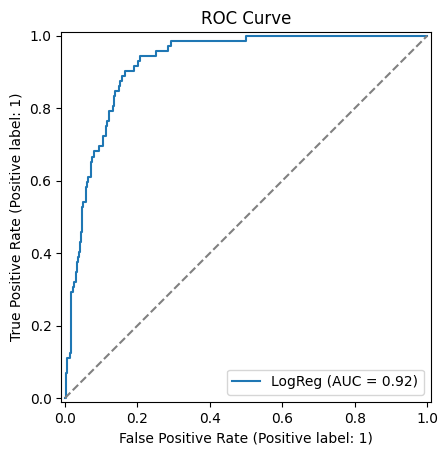

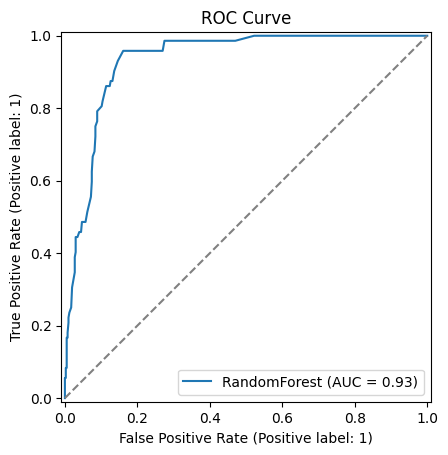

In [69]:
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, name="LogReg")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="RandomForest")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve")
plt.legend()
plt.show()

In [70]:
baseline_f1 = round(f1_score(y_test, y_pred_logreg), 3)
print("Baseline F1 Score:", baseline_f1)

Baseline F1 Score: 0.537


#### Class Imbalance

Class imbalance in machine learning occurs when the classes within a dataset are not equally represented, with one class having significantly more samples than others (like drivers without a podium compared to those who finished on the podium). This can lead to biased model performance, where the model favors the majority class and performs poorly on the minority class (like what we've previously seen with baseline models).

Various techniques can be employed to mitigate the effects of class imbalance, including:

* **Learning with a focus on costs**: Assign varying prices for misclassifying based on the importance of each class;

* **Resampling**: Oversampling the minority class (creating more instances) or undersampling the majority class (removing instances);

* **Choosing an algorithm**: Select algorithms that are well-suited for dealing with unbalanced data, like decision trees, random forests, and gradient boosting etc.

##### Learning with a focus on costs

In [71]:
# Logistic Regression with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("===== Logistic Regression (balanced) =====")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_logreg), 3))

===== Logistic Regression (balanced) =====
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       404
           1       0.40      0.96      0.57        72

    accuracy                           0.78       476
   macro avg       0.70      0.85      0.71       476
weighted avg       0.90      0.78      0.81       476

ROC AUC: 0.92


In [72]:
# Random Forest with class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("===== Random Forest (balanced) =====")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

===== Random Forest (balanced) =====
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       404
           1       0.64      0.39      0.48        72

    accuracy                           0.87       476
   macro avg       0.77      0.67      0.71       476
weighted avg       0.86      0.87      0.86       476

ROC AUC: 0.937


With Logistic Regression the target metric has increased a little (from 0.54 to 0.57), however with Random Forest it decreased (from 0.54 to 0.48). Let's try some other methods.

##### Over-sampling

Let's try implementing SMOTE (Synthetic Minority Oversampling Technique) to increase our target metric (f1-score). SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. This way we are over-samplinn the data to fight class imbalance

For better results let's try using ADASYN (Adaptive Synthetic Sampling Method). It generates more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

In [73]:
# Resampling with ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

print(f"Before ADASYN: {y_train.value_counts()}")
print(f"After ADASYN: {pd.Series(y_resampled).value_counts()}")

Before ADASYN: podium
0    22118
1     3304
Name: count, dtype: int64
After ADASYN: podium
1    22672
0    22118
Name: count, dtype: int64


In [74]:
# Lofistic Regression with ADASYN
logreg_adasyn = LogisticRegression(max_iter=1000, random_state=42)
logreg_adasyn.fit(X_resampled, y_resampled)
y_pred_logreg_adasyn = logreg_adasyn.predict(X_test_scaled)
y_proba_logreg_adasyn = logreg_adasyn.predict_proba(X_test_scaled)[:, 1]

print("===== Logistic Regression (ADASYN) =====")
print(classification_report(y_test, y_pred_logreg_adasyn))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_logreg_adasyn), 3))


===== Logistic Regression (ADASYN) =====
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       404
           1       0.40      0.96      0.57        72

    accuracy                           0.78       476
   macro avg       0.70      0.85      0.71       476
weighted avg       0.90      0.78      0.81       476

ROC AUC: 0.923


The metrics haven't changed

In [75]:
# Random Forest with ADASYN
rf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_adasyn.fit(X_resampled, y_resampled)
y_pred_rf_adasyn = rf_adasyn.predict(X_test)
y_proba_rf_adasyn = rf_adasyn.predict_proba(X_test)[:, 1]

print("===== Random Forest (ADASYN) =====")
print(classification_report(y_test, y_pred_rf_adasyn))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf_adasyn), 3))


===== Random Forest (ADASYN) =====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       404
           1       0.15      1.00      0.26        72

    accuracy                           0.15       476
   macro avg       0.08      0.50      0.13       476
weighted avg       0.02      0.15      0.04       476

ROC AUC: 0.471


Well, that did not get us the anticipated results, especially with RF. This is a full-on model breakdown. It’s predicting only class 1, likely because:

    Oversampled data is too "synthetic" for RF to generalize well.

    Tree-based models are sensitive to class distribution distortion by SMOTE (especially with high-dimensional sparse data like after encoding).



From now on we will either tune the class weights or choose specific algorithms that work well with imbalanced data

### Tuning hyperparameters

To optimize the hyperparameters we will use Optuna since it's more time-efficient compared to other methods:

In [76]:
# Hyperparameter tuning with Optuna for Logistic Regression
def optuna_logreg(trial):
    # parameters grid
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    solver = "saga"  # supports all penalties and works well for large data
    
    # Elasticnet needs l1_ratio
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
    else:
        l1_ratio = None

    C = trial.suggest_loguniform("C", 1e-3, 10)

    model = LogisticRegression(
        penalty=penalty,
        C=C,
        l1_ratio=l1_ratio,
        solver=solver,
        class_weight="balanced",
        max_iter=1000,
        random_state=42
    )

    model.fit(X_train_scaled, y_train)
    score = f1_score(y_test, model.predict(X_test_scaled))

    return score

In [77]:
%%time
# creating a study object
#study_lr = optuna.create_study(study_name="Logistic Regression", direction="maximize")
# optimizing the study
#study_lr.optimize(optuna_logreg, n_trials=50)

CPU times: total: 0 ns
Wall time: 999 μs


In [78]:
# printing the best parameters and score
#print("Best parameters: {}".format(study_lr.best_params))
#print("f1_score on the training set: {:.3f}".format(study_lr.best_value))
# Best parameters: {'penalty': 'l2', 'C': 0.00699402912743506}
# f1_score on the training set: 0.568

In [79]:
best_params_lr = {'penalty': 'l2', 'C': 0.00699402912743506}

Not bad, but not better either. Now with the Random Forest:

In [80]:
# Optuna for hyperparameter tuning in Random Forest
def optuna_rf(trial):
  # parameters grid
  n_estimators = trial.suggest_int('n_estimators', 100, 300, 10)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
  class_weight = trial.suggest_categorical('class_weight', ['balanced'])

  model = RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          max_features=max_features,
                                          class_weight=class_weight,
                                          random_state=random_state)
  # Fitting the model
  model.fit(X_train, y_train)
  score = f1_score(y_test, model.predict(X_test))

  return score

In [81]:
%%time
# creating a study object
#study_rf = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# optimizing the study
#study_rf.optimize(optuna_rf, n_trials=50)

CPU times: total: 0 ns
Wall time: 0 ns


In [82]:
#study_rf.optimize(optuna_rf, n_trials=50)

In [83]:
# printing the best parameters and score
#print("Best parameters: {}".format(study_rf.best_params))
#print("f1_score on the training set: {:.3f}".format(study_rf.best_value))
# Best parameters: {'n_estimators': 270, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'class_weight': 'balanced'}
# f1_score on the training set: 0.723

In [84]:
best_params_rf = {'n_estimators': 270, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'class_weight': 'balanced'}

In [85]:
model = RandomForestClassifier(**best_params_rf, random_state=random_state)
# Fitting the model
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("===== Random Forest (Optuna Tuning) =====")
print(classification_report(y_test, y_test_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

===== Random Forest (Optuna Tuning) =====
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       404
           1       0.64      0.83      0.72        72

    accuracy                           0.90       476
   macro avg       0.80      0.87      0.83       476
weighted avg       0.92      0.90      0.91       476

ROC AUC: 0.937


That's a great increase in the f1-score! From 0.57 to 0.72. The great difference between the f1-scores on the training and testing sets does imply the overfitting though. However, to be fair, we have to keep in mind that race outcomes can be quite random: our data doesn't account for sudden failures of the power units, safety cars etc.

### Advanced Modeling

Let's try some more advanced ML algorithms in case they increase our target metric

#### Singular Models

##### Hist Gradient Boosting Classifier

The HistGradientBoostingClassifier is a type of ensemble learning algorithm that combines multiple weak models to create a strong predictive model. It is an implementation of the gradient boosting algorithm, which is a popular technique in machine learning for classification and regression tasks.

In [86]:
gb = HistGradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42,
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]
print("===== Hist Gradient Boosting =====")  
print(classification_report(y_test, y_pred_gb))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_gb), 3))

===== Hist Gradient Boosting =====
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       404
           1       0.71      0.61      0.66        72

    accuracy                           0.90       476
   macro avg       0.82      0.78      0.80       476
weighted avg       0.90      0.90      0.90       476

ROC AUC: 0.937


##### Extreme Gradient Boosting Classifier

The XGBClassifier is a popular implementation of the Extreme Gradient Boosting (XGBoost) algorithm in Python, specifically designed for classification tasks. 

In [87]:
# Typically, scale_pos_weight (xgb hyperparameter) is calculated as sum(negative class) / sum(positive class)
# in our case, it would be:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [88]:
xgb = XGBClassifier(
    n_estimators=160,
    max_depth=15,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # Adjusting for class imbalance 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
print("===== XGBoost =====")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_xgb), 3))

===== XGBoost =====
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       404
           1       0.62      0.75      0.68        72

    accuracy                           0.89       476
   macro avg       0.79      0.83      0.81       476
weighted avg       0.90      0.89      0.90       476

ROC AUC: 0.933


##### Light Gradient Boosting Machine

LightGBM, short for Light Gradient-Boosting Machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.

In [89]:
lgb = LGBMClassifier(
    n_estimators=300,
    max_depth=16,
    learning_rate=0.05,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
y_proba_lgb = lgb.predict_proba(X_test)[:, 1]
print("===== LightGBM =====")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_lgb), 3))

[LightGBM] [Info] Number of positive: 3304, number of negative: 22118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 25422, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
===== LightGBM =====
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       404
           1       0.48      0.89      0.63        72

    accuracy                           0.84       476
   macro avg       0.73      0.86      0.76       476
weighted avg       0.90      0.84      0.86       476

ROC AUC: 0.933


##### CatBoost Classifier

CatBoost is a machine learning method based on gradient boosting over decision trees. 

In [90]:
cat = CatBoostClassifier(
    iterations=300,
    depth=10,
    learning_rate=0.05,
    loss_function='Logloss',
    verbose=0,
    random_seed=42
)

cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
y_proba_cat = cat.predict_proba(X_test)[:, 1]
print("===== CatBoost =====")
print(classification_report(y_test, y_pred_cat))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_cat), 3))

===== CatBoost =====
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       404
           1       0.70      0.61      0.65        72

    accuracy                           0.90       476
   macro avg       0.82      0.78      0.80       476
weighted avg       0.90      0.90      0.90       476

ROC AUC: 0.93


##### Tuning the hyperparameters

In [91]:
def objective_hist(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_iter': trial.suggest_int('max_iter', 100, 300),
        'random_state': 42
    }
    
    model = HistGradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds)

# Create the Optuna study and optimize
study_hist = optuna.create_study(direction='maximize')
#study_hist.optimize(objective_hist, n_trials=30)

[I 2025-06-28 13:02:56,072] A new study created in memory with name: no-name-e63c86b9-7a38-4b8a-8908-bd0602a9cdfb


In [92]:
#study_hist.optimize(objective_hist, n_trials=30)

In [93]:
#study_hist.optimize(objective_hist, n_trials=30)

In [94]:
#best_params_hist = study_hist.best_params
#best_score_hist = study_hist.best_value
#print("Best parameters for Hist XGBoost:", best_params_hist)
#print("Best F1 score for hist XGBoost:", best_score_hist)

Best parameters for XGBoost: {'max_depth': 25, 'learning_rate': 0.23493761014954043, 'max_iter': 221}

Best F1 score for XGBoost: 0.6944444444444444

In [95]:
best_params_hist = {'max_depth': 25, 'learning_rate': 0.23493761014954043, 'max_iter': 221}

In [96]:
# Define the objective function for Optuna
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.4),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds)

# Create the Optuna study and optimize
study_xgb = optuna.create_study(direction='maximize')
#study_xgb.optimize(objective_xgb, n_trials=30)

[I 2025-06-28 13:02:56,290] A new study created in memory with name: no-name-f117720b-3e45-4ee6-a76e-f276deb7b64a


In [97]:
#study_xgb.optimize(objective_xgb, n_trials=50)

In [98]:
#best_params_xgb = study_xgb.best_params
#best_score_xgb = study_xgb.best_value
#print("Best parameters for XGBoost:", best_params_xgb)
#print("Best F1 score for XGBoost:", best_score_xgb)
# Best parameters for XGBoost: {'n_estimators': 226, 'max_depth': 6, 'learning_rate': 0.035626156204671584, 'subsample': 0.8159811763793864, 'colsample_bytree': 0.7470016164181874, 'gamma': 0.049336685325739205}
# Best F1 score for XGBoost: 0.6814814814814815

In [99]:
best_params_xgb = {'n_estimators': 226, 'max_depth': 6, 'learning_rate': 0.035626156204671584, 'subsample': 0.8159811763793864, 'colsample_bytree': 0.7470016164181874, 'gamma': 0.049336685325739205}

In [100]:
def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "class_weight": "balanced",
        "random_state": 42
    }
    
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds)
    

study_lgbm = optuna.create_study(direction="maximize")
#study_lgbm.optimize(objective_lgbm, n_trials=30)

[I 2025-06-28 13:02:56,462] A new study created in memory with name: no-name-bc03c70b-b534-44f1-999f-78f408cb5d90


In [101]:
#best_params_lgbm = study_lgbm.best_params
#best_score_lgbm = study_lgbm.best_value
#print("Best LGBM params:", study_lgbm.best_params)
#print("Best LGBM score:", study_lgbm.best_value)

Best LGBM params: {'n_estimators': 145, 'learning_rate': 0.24804412116314925, 'num_leaves': 146, 'max_depth': 20, 'min_child_samples': 25, 'subsample': 0.6861749186751136, 'colsample_bytree': 0.7242191280868225}

Best LGBM score: 0.6794871794871795

In [102]:
best_params_lgbm = {'n_estimators': 145, 'learning_rate': 0.24804412116314925, 'num_leaves': 146, 'max_depth': 20, 'min_child_samples': 25, 'subsample': 0.6861749186751136, 'colsample_bytree': 0.7242191280868225}

In [103]:
def objective_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "verbose": 0,
        "class_weights": [1, sum(y_train==0) / sum(y_train==1)],
        "random_state": 42
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds)

#study_cat = optuna.create_study(direction="maximize")
#study_cat.optimize(objective_cat, n_trials=30)

#best_params_cat = study_cat.best_params
#best_score_cat = study_cat.best_value
#print("Best CatBoost params:", best_params_cat)
#print("Best CatBoost score:", best_score_cat)


Best CatBoost params: {'iterations': 726, 'depth': 7, 'learning_rate': 0.11339848188984773, 'l2_leaf_reg': 6.589824825474053, 'border_count': 215, 'random_strength': 1.2042911169993356, 'bagging_temperature': 0.04186475467433415}

Best CatBoost score: 0.718562874251497


In [104]:
best_params_cat = {'iterations': 726, 'depth': 7, 'learning_rate': 0.11339848188984773, 'l2_leaf_reg': 6.589824825474053, 'border_count': 215, 'random_strength': 1.2042911169993356, 'bagging_temperature': 0.04186475467433415}

#### Ensembles

In [105]:
estimators = [
    ('gb', HistGradientBoostingClassifier(**best_params_hist)),
    ('xgb', XGBClassifier(**best_params_xgb)),
    ('lgbm', LGBMClassifier(**best_params_lgbm)),
    ('cat', CatBoostClassifier(**best_params_cat)),
    ('rf', RandomForestClassifier(**best_params_rf)),
]

stacked = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), passthrough=False)
stacked.fit(X_train, y_train)       
y_pred = stacked.predict(X_test)
y_proba = stacked.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 3304, number of negative: 22118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2167
[LightGBM] [Info] Number of data points in the train set: 25422, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.129966 -> initscore=-1.901258
[LightGBM] [Info] Start training from score -1.901258
0:	learn: 0.5647047	total: 50.3ms	remaining: 36.5s
1:	learn: 0.4804177	total: 90.2ms	remaining: 32.7s
2:	learn: 0.4068792	total: 128ms	remaining: 30.8s
3:	learn: 0.3658025	total: 164ms	remaining: 29.6s
4:	learn: 0.3317701	total: 203ms	remaining: 29.2s
5:	learn: 0.3115078	total: 240ms	remaining: 28.8s
6:	learn: 0.2975334	total: 280ms	remaining: 28.8s
7:	learn: 0.2834055	total: 317ms	remaining: 28.5s
8:	learn: 0.2758570	total: 362ms	remainin

In [106]:
print(f"===== {stacked} =====")
print(classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

===== StackingClassifier(estimators=[('gb',
                                HistGradientBoostingClassifier(learning_rate=0.23493761014954043,
                                                               max_depth=25,
                                                               max_iter=221)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7470016164181874,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metri...
                                LGBMC

F1-score at 0.70 - a solid result! However, simple Random Forest with tuned hyperparameters still gave us a better score of 0.723

In [107]:
y_pred_thresh = (y_proba > 0.2).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       404
           1       0.50      0.90      0.64        72

    accuracy                           0.85       476
   macro avg       0.74      0.87      0.77       476
weighted avg       0.91      0.85      0.86       476



Well, that did not help

In [108]:
# Creating a Decision Tree Classifier as the base estimator for AdaBoost
dt = DecisionTreeClassifier(
    max_depth=3, 
    random_state=42 
)
# Creating the AdaBoost classifier
ada = AdaBoostClassifier(
    estimator=dt, # base estimator
    random_state=42, 
    n_estimators=10 
)

ada.fit(X_train, y_train)
ada_pred  = ada.predict(X_test)
y_proba_ada = ada.predict_proba(X_test)[:, 1]
print("===== AdaBoost Classifier =====")
print(classification_report(y_test, ada_pred))  
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_ada), 3))

===== AdaBoost Classifier =====
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       404
           1       0.69      0.65      0.67        72

    accuracy                           0.90       476
   macro avg       0.81      0.80      0.81       476
weighted avg       0.90      0.90      0.90       476

ROC AUC: 0.933


In [109]:
def objective_ada(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return f1_score(y_test, preds)

study_ada = optuna.create_study(direction='maximize')
#study_ada.optimize(objective_ada, n_trials=30)

#best_params_ada = study_ada.best_params
#best_score_ada = study_ada.best_value
#print("Best parameters for AdaBoost:", best_params_ada)
#print("Best F1 score for AdaBoost:", best_score_ada)

[I 2025-06-28 13:07:32,235] A new study created in memory with name: no-name-d457e3ab-dc73-4103-9f43-6c825daec0ee


Best parameters for AdaBoost: {'n_estimators': 225, 'learning_rate': 0.16724422054663723}

Best F1 score for AdaBoost: 0.7222222222222222

In [110]:
best_params_ada = {'n_estimators': 225, 'learning_rate': 0.16724422054663723}

At last, let's try combining our best two models (RandomForestClassifier and AdaBoost) to see if we can get a better result.

In [111]:
voting_clf = VotingClassifier(estimators=[
    ('ada', AdaBoostClassifier(**best_params_ada, random_state=42)),
    ('rf', RandomForestClassifier(**best_params_rf)),
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]
print("===== Voting Classifier =====")
print(classification_report(y_test, y_pred_voting))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_voting), 3))

===== Voting Classifier =====
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       404
           1       0.63      0.72      0.67        72

    accuracy                           0.89       476
   macro avg       0.79      0.82      0.80       476
weighted avg       0.90      0.89      0.90       476

ROC AUC: 0.937


In [112]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(**best_params_rf)),
        ('ada', AdaBoostClassifier(**best_params_ada))
    ],
    final_estimator=LogisticRegression(),
    passthrough=True  # Optional: let meta-model also see raw features
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]


In [113]:
print("===== Stacking Classifier =====")
print(classification_report(y_test, y_pred_stack))  
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_stack), 3))

===== Stacking Classifier =====
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       404
           1       0.61      0.64      0.62        72

    accuracy                           0.88       476
   macro avg       0.77      0.78      0.78       476
weighted avg       0.89      0.88      0.88       476

ROC AUC: 0.919


Unfortunately, the results didn't get better. The best model is still RandomForestClassifier with tuned hyperparameters.

### 🏁 Final Model Evaluation – Random Forest (Optuna Tuning)

Let's see it again:

In [114]:
# The best model
model = RandomForestClassifier(**best_params_rf, random_state=random_state)
# Fitting the model
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("===== Random Forest (Optuna Tuning) =====")
print(classification_report(y_test, y_test_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))
print("Baseline F1 Score:", baseline_f1)

===== Random Forest (Optuna Tuning) =====
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       404
           1       0.64      0.83      0.72        72

    accuracy                           0.90       476
   macro avg       0.80      0.87      0.83       476
weighted avg       0.92      0.90      0.91       476

ROC AUC: 0.937
Baseline F1 Score: 0.537


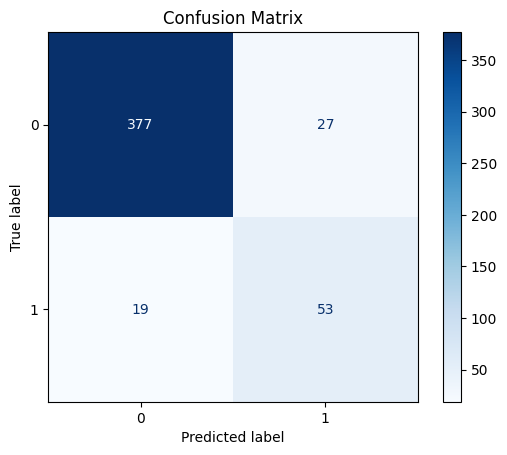

In [115]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

The final Random Forest model, optimized via **Optuna hyperparameter tuning**, demonstrates strong performance across all major metrics. It achieves an **overall accuracy of 90%** and a **macro-averaged F1 score of 0.83**, indicating balanced performance between the majority and minority classes.

Class 1 (podium finishers), which is the minority class, achieved a **precision of 0.64** and a **recall of 0.83**, resulting in an **F1 score of 0.723** — a substantial improvement over the **baseline F1 score of 0.537**. This shows that the model is significantly better at identifying podium finishes than a naive baseline or untuned model.

Additionally, the model achieved a **ROC AUC of 0.937**, reflecting strong discriminative power in ranking positive vs. negative outcomes. The relatively high recall for class 1 indicates that the model is effective at minimizing false negatives, which is critical in identifying top-performing drivers.

These results suggest that the tuned Random Forest model is both robust and reliable, and can serve as a strong candidate for predicting podium finishes in future Formula 1 races.


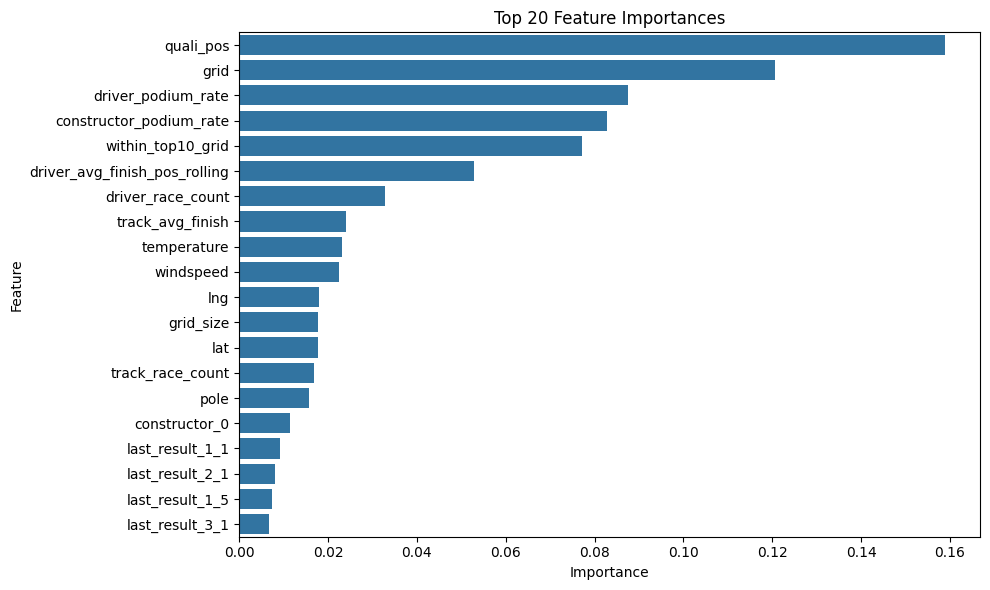

In [116]:
importances = model.feature_importances_
feature_names = X_test.columns
indices = importances.argsort()[::-1][:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Top 20 Most Important Features**

The feature importance analysis of our best-performing Random Forest model reveals valuable insights into the factors that most strongly 
influence podium predictions in Formula 1 races. The top 20 features, as visualized above, highlight the critical role of both driver and constructor performance metrics, as well as track-specific characteristics and recent form indicators.

Key takeaways include:

- **Driver and Constructor Performance:** Features such as rolling averages of driver finish positions, podium rates, and constructor statistics are consistently among the most influential. This underscores the importance of historical and recent performance in predicting future success.
- **Track Characteristics:** Track-specific averages and historical results play a significant role, suggesting that certain circuits favor 
particular drivers or teams.
- **Recent Form:** Rolling and season-based metrics capture momentum and consistency, which are vital in a sport where performance can 
fluctuate due to numerous variables.

Overall, the model's reliance on a diverse set of features demonstrates the complexity of podium prediction in Formula 1, where success is 
shaped by a combination of skill, team strength, and contextual factors. These insights can inform strategic decisions for teams and analysts.

## 6. Deployment

### Custom Transformer

Creating a custom transformer for all preprocessing steps:

In [117]:
class F1DataPreprocessor(BaseEstimator, TransformerMixin):
    """
    Pipeline-compatible F1 data preprocessor that handles target variable correctly.
    """
    
    def __init__(self, 
                 circuits_df=None, 
                 races_df=None, 
                 weather_features_df=None,
                 dnf_penalty_type='last_plus_2',
                 rolling_window_size=10,
                 encode_categoricals=True):
        """
        Initialize the F1 data preprocessor for pipeline use.
        """
        self.circuits_df = circuits_df
        self.races_df = races_df
        self.weather_features_df = weather_features_df
        self.dnf_penalty_type = dnf_penalty_type
        self.rolling_window_size = rolling_window_size
        self.encode_categoricals = encode_categoricals
        
        # Will be fitted during training
        self.binary_encoder_ = None
        self.constructor_family_map_ = None
        self.fitted_ = False
        self.surviving_indices_ = None
    
    def _remove_duplicates(self, df):
        """Remove duplicate rows."""
        return df.drop_duplicates()
    
    def _handle_missing_values(self, df):
        """Handle missing values in key columns."""
        df = df.copy()
        
        # Fill missing qualifying positions with grid positions
        df['quali_pos'] = df['quali_pos'].fillna(df['grid'])
        
        # Convert '\N' in finish_pos to np.nan
        df['finish_pos'] = df['finish_pos'].apply(lambda x: np.nan if x == '\\N' else x)
        
        return df
    
    def _calculate_race_grid_size(self, df):
        """Calculate the actual grid size for each race."""
        race_grid_sizes = df.groupby('raceId')['driverId'].nunique().reset_index()
        race_grid_sizes.columns = ['raceId', 'grid_size']
        df_with_grid = df.merge(race_grid_sizes, on='raceId', how='left')
        return df_with_grid
    
    def _get_dynamic_dnf_penalty(self, grid_size, penalty_type='last_plus_2'):
        """Calculate dynamic DNF penalty based on grid size."""
        if penalty_type == 'last_plus_1':
            return grid_size + 1
        elif penalty_type == 'last_plus_2':
            return grid_size + 2
        elif penalty_type == 'last_plus_percentile':
            return int(grid_size + (grid_size * 0.1))
        elif penalty_type == 'fixed_percentile':
            return int(grid_size * 0.9)
        else:
            return grid_size + 2
    
    def _handle_dnf_penalties(self, df):
        """Apply DNF penalties to non-finishers."""
        df = df.copy()
        df = self._calculate_race_grid_size(df)
        
        # Apply DNF penalties
        df['finish_pos'] = df.apply(
            lambda row: self._get_dynamic_dnf_penalty(row['grid_size'], self.dnf_penalty_type) 
            if pd.isna(row['finish_pos']) else row['finish_pos'], 
            axis=1
        )
        
        return df
    
    def _create_target(self, df):
        """Create podium target variable."""
        df = df.copy()
        
        # Create podium binary target
        df['podium'] = df['finish_pos'].astype(int).apply(lambda x: 1 if x <= 3 else 0)
        
        return df
    
    def _create_grid_features(self, df):
        """Create grid-based features."""
        df = df.copy()
        
        # Pole position feature
        df["pole"] = (df["grid"] == 1).astype(int)
        
        # Top 10 grid feature
        df["within_top10_grid"] = (df["grid"] <= 10).astype(int)
        
        return df
    
    
    def _create_constructor_families(self, df):
        """Create constructor family mappings."""
        if self.constructor_family_map_ is None:
            # Define constructor families
            unique_constructors = set(df['constructor'].unique())
            constructor_family_map = {}
            
            # Big stable teams
            stable_teams = ['Ferrari', 'McLaren', 'Williams', 'Red Bull', 'Mercedes', 'Haas', 'Toyota', 'Honda']
            for name in stable_teams:
                constructor_family_map[name] = name
                for c in unique_constructors:
                    if name in c:
                        constructor_family_map[c] = name
            
            # Team lineages
            lineages = {
                'Sauber': ['Sauber', 'BMW Sauber', 'Alfa Romeo', 'Kick Sauber'],
                'Aston Martin': ['Jordan', 'Midland', 'Spyker MF1', 'Spyker', 'Force India', 'Racing Point', 'Aston Martin'],
                'Enstone': ['Toleman', 'Benetton', 'Renault', 'Lotus F1', 'Alpine F1 Team', 'Alpine'],
                'Racing Bulls': ['Minardi', 'Toro Rosso', 'AlphaTauri', 'VCARB', 'RB F1 Team'],
                'Red Bull': ['Jaguar', 'Stewart', 'Red Bull'],
                'Marussia': ['Manor', 'Virgin', 'Marussia', 'Manor Marussia'],
                'Mercedes': ['Tyrrell', 'BAR', 'Honda', 'Brawn GP', 'Mercedes']
            }
            
            for family, constructors in lineages.items():
                for constructor in constructors:
                    if constructor in unique_constructors:
                        constructor_family_map[constructor] = family
            
            # Remaining teams default to themselves
            for c in unique_constructors:
                if c not in constructor_family_map:
                    constructor_family_map[c] = c
            
            self.constructor_family_map_ = constructor_family_map
        
        df = df.copy()
        df['constructor_family'] = df['constructor'].replace(self.constructor_family_map_)
        
        return df
    
    def _merge_external_data(self, df):
        """Merge circuit, race, and weather data."""
        df = df.copy()
        
        # Merge circuits data
        if self.circuits_df is not None:
            df = df.merge(self.circuits_df[['circuit', 'lat', 'lng']], on="circuit", how="left")
        
        # Merge races data
        if self.races_df is not None:
            df = df.merge(self.races_df[['date', 'time', 'raceId']], on='raceId', how='left')
            
            # Handle datetime conversion
            df['time'] = df['time'].replace('\\N', np.nan)
            df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time
            df['time'] = df['time'].fillna(
                df.groupby('circuit')['time'].transform(
                    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else '14:00:00')
                )
            )
            
            df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
            df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time
            df['datetime'] = df.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)
        
        # Merge weather data
        if self.weather_features_df is not None:
            df = df.merge(self.weather_features_df, on='raceId', how='left')
            
            # Create weather-based features
            df['wet_race'] = df['precipitation'].apply(lambda x: 1 if x > 0 else 0)
            df['windy_race'] = df['windspeed'].apply(lambda x: 1 if x > 20 else 0)
            df['hot'] = df['temperature'].apply(lambda x: 1 if x > 30 else 0)
            df['cold'] = df['temperature'].apply(lambda x: 1 if x < 10 else 0)
        
        return df.drop_duplicates()
    
    def _calculate_driver_avg_finish_position_rolling(self, df):
        """Calculate driver's average finish position over rolling window."""
        df_copy = df.copy()
        df_copy['finish_pos'] = pd.to_numeric(df_copy['finish_pos'], errors='coerce')
        df_copy = df_copy.sort_values(['driverId', 'datetime']).reset_index(drop=True)
        df_copy['driver_avg_finish_pos_rolling'] = np.nan
        
        for driver_id in df_copy['driverId'].unique():
            driver_mask = df_copy['driverId'] == driver_id
            driver_races = df_copy[driver_mask].copy()
            
            finish_positions = driver_races['finish_pos'].values
            avg_finish_positions = []
            
            for i in range(len(finish_positions)):
                if i == 0:
                    avg_finish_positions.append(np.nan)
                else:
                    start_idx = max(0, i - self.rolling_window_size)
                    recent_finishes = finish_positions[start_idx:i]
                    valid_finishes = recent_finishes[recent_finishes <= 30]
                    
                    if len(valid_finishes) > 0:
                        avg_finish_positions.append(np.mean(valid_finishes))
                    else:
                        avg_finish_positions.append(np.nan)
            
            df_copy.loc[driver_mask, 'driver_avg_finish_pos_rolling'] = avg_finish_positions
        
        return df_copy
    
    def _create_historical_features(self, df):
        """Create historical performance features."""
        df = df.copy()
        df = df.sort_values(by=['year', 'round', 'driver']).reset_index(drop=True)
        
        # Driver race count
        df['driver_race_count'] = df.groupby('driverId').cumcount()
        
        # Last race results
        for i in range(1, 4):
            df[f'last_result_{i}'] = df.groupby('driverId')['finish_pos'].shift(i)
        
        # Rolling average finish position
        df = self._calculate_driver_avg_finish_position_rolling(df)
        
        # Constructor podium rate
        df = df.sort_values(by=['constructor', 'datetime']).reset_index(drop=True)
        df['constructor_podium_rate'] = (
            df.groupby('constructor')['podium']
            .apply(lambda x: x.shift().expanding().mean())
            .reset_index(drop=True)
        )
        
        # Driver podium rate
        df = df.sort_values(by=['driverId', 'datetime']).reset_index(drop=True)
        df['driver_podium_rate'] = (
            df.groupby('driverId')['podium']
            .apply(lambda x: x.shift().expanding().mean())
            .reset_index(drop=True)
        )
        
        # Track-specific features
        df = df.sort_values(by=['driverId', 'circuit', 'year', 'round']).reset_index(drop=True)
        df['track_race_count'] = df.groupby(['driverId', 'circuit']).cumcount()
        
        df['finish_pos'] = df['finish_pos'].astype(float)
        df['track_avg_finish'] = (
            df.groupby(['driverId', 'circuit'])['finish_pos']
            .apply(lambda x: x.shift().expanding().mean())
            .reset_index(drop=True)
        )
        df = df.sort_values(by=['datetime', 'finish_pos']).reset_index(drop=True)
        
        return df
    
    
    
    def _apply_categorical_encoding(self, df):
        """Apply binary encoding to categorical variables."""
        if not self.encode_categoricals:
            return df
            
        df_encoded = df.copy()
        
        # Fill NaNs in last_result columns
        for col in ['last_result_1', 'last_result_2', 'last_result_3']:
            if col in df_encoded.columns:
                df_encoded[col] = df_encoded[col].fillna('Unknown')
        
        # Binary encode high-cardinality categoricals
        high_card_cols = ['driver', 'constructor', 'constructor_family', 'circuit', 
                         'last_result_1', 'last_result_2', 'last_result_3']
        high_card_cols = [col for col in high_card_cols if col in df_encoded.columns]
        
        if high_card_cols:
            if self.binary_encoder_ is None:
                self.binary_encoder_ = ce.BinaryEncoder(cols=high_card_cols)
                df_encoded = self.binary_encoder_.fit_transform(df_encoded)
            else:
                df_encoded = self.binary_encoder_.transform(df_encoded)
        
        return df_encoded
    
    def _handle_missing_indicators(self, df):
        """Create missing value indicators and fill missing values."""
        df = df.copy()
        
        # Create missing indicators for key columns
        missing_cols = ['driver_avg_finish_pos_rolling', 'constructor_podium_rate', 
                       'driver_podium_rate', 'track_avg_finish']
        
        for col in missing_cols:
            if col in df.columns:
                df[col + '_missing'] = df[col].isna().astype(int)
                df[col].fillna(-1, inplace=True)
        
        return df
    
    def _clean_final_dataset(self, df):
        """Final cleaning steps - MODIFIED to preserve indices."""
        df = df.copy()
        
        # CRITICAL: Store original indices before filtering
        original_indices = df.index.copy()
        
        # Filter out drivers with no race experience
        mask = df['driver_race_count'] > 0
        df_filtered = df[mask]
        
        # Store which original indices survived the filtering
        self.surviving_indices_ = original_indices[mask]
        
        df_filtered = df_filtered.sort_values(by=['year', 'round']).reset_index(drop=True)
        
        # Drop unnecessary columns
        cols_to_drop = ['raceId', 'driverId', 'date', 'time', 'datetime', 
                       'finish_pos', 'status', 'points', 'round']
        
        # Only drop columns that exist
        cols_to_drop = [col for col in cols_to_drop if col in df_filtered.columns]
        df_filtered = df_filtered.drop(columns=cols_to_drop)
        
        return df_filtered
    
    def fit(self, X, y=None):
        """Fit the transformer to the data."""
        # Store constructor family mapping and binary encoder
        X_temp = X.copy()
        
        # Create constructor families to fit the mapping
        X_temp = self._create_constructor_families(X_temp)
        
        # If encoding is enabled, fit the binary encoder
        if self.encode_categoricals:
            # Process data enough to fit encoder
            X_temp = self._remove_duplicates(X_temp)
            X_temp = self._handle_missing_values(X_temp)
            X_temp = self._handle_dnf_penalties(X_temp)
            X_temp = self._create_target(X_temp)
            X_temp = self._create_grid_features(X_temp)
            X_temp = self._merge_external_data(X_temp)
            X_temp = self._create_historical_features(X_temp)
            
            # Fit binary encoder
            for col in ['last_result_1', 'last_result_2', 'last_result_3']:
                if col in X_temp.columns:
                    X_temp[col] = X_temp[col].fillna('Unknown')
            
            high_card_cols = ['driver', 'constructor', 'constructor_family', 'circuit', 
                             'last_result_1', 'last_result_2', 'last_result_3']
            high_card_cols = [col for col in high_card_cols if col in X_temp.columns]
            
            if high_card_cols:
                self.binary_encoder_ = ce.BinaryEncoder(cols=high_card_cols)
                self.binary_encoder_.fit(X_temp)
        
        self.fitted_ = True
        return self
    
    def transform(self, X):
        """Transform the data."""
        check_is_fitted(self, 'fitted_')
        
        # Apply all preprocessing steps
        X_transformed = self._remove_duplicates(X)
        X_transformed = self._handle_missing_values(X_transformed)
        X_transformed = self._handle_dnf_penalties(X_transformed)
        X_transformed = self._create_target(X_transformed)
        X_transformed = self._create_grid_features(X_transformed)
        X_transformed = self._create_constructor_families(X_transformed)
        X_transformed = self._merge_external_data(X_transformed)
        X_transformed = self._create_historical_features(X_transformed)
        X_transformed = self._apply_categorical_encoding(X_transformed)
        X_transformed = self._handle_missing_indicators(X_transformed)
        X_transformed = self._clean_final_dataset(X_transformed)
        
        return X_transformed


# Let's check that everything works as expected

# Initialize the preprocessor
preprocessor = F1DataPreprocessor(
    circuits_df=circuits,
    races_df=races,
    weather_features_df=weather_features,
    dnf_penalty_type='last_plus_2',
    rolling_window_size=10,
    encode_categoricals=True
)

# Instantiate the model
model = RandomForestClassifier(**best_params_rf, random_state=random_state)

df_train_raw = df_raw[df_raw['year'] <= 2023]
df_test_raw = df_raw[df_raw['year'] > 2023]

df_train_raw = df_train_raw.copy()
df_test_raw = df_test_raw.copy()

df_train_raw['dataset'] = 'train'
df_test_raw['dataset'] = 'test'

df_all_raw = pd.concat([df_train_raw, df_test_raw], ignore_index=True)

preprocessor.fit(df_train_raw)  
df_all_processed = preprocessor.transform(df_all_raw)

dataset_flags = df_all_raw.loc[preprocessor.surviving_indices_, 'dataset'].reset_index(drop=True)
df_all_processed = df_all_processed.copy()
df_all_processed['dataset'] = dataset_flags

df_train = df_all_processed[df_all_processed['dataset'] == 'train'].drop(columns=['dataset'])
df_test = df_all_processed[df_all_processed['dataset'] == 'test'].drop(columns=['dataset'])

y_train = df_train['podium']
y_test = df_test['podium']

X_train = df_train.drop(columns=['podium', 'year']) 
X_test = df_test.drop(columns=['podium', 'year'])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       404
           1       0.64      0.79      0.71        72

    accuracy                           0.90       476
   macro avg       0.80      0.86      0.82       476
weighted avg       0.91      0.90      0.91       476



Saving everything for deployment:

In [118]:
# Save the preprocessor and model
joblib.dump(preprocessor, 'f1_preprocessor.pkl')

# Training our model on all availaible data for possible future use
model = RandomForestClassifier(**best_params_rf, random_state=random_state)
model.fit(df_all_processed.drop(columns=['podium', 'year', 'dataset']), df_all_processed['podium'])
joblib.dump(model, 'models/model.pkl')

# Save the race history data
race_history = df_raw.copy()
race_history.to_csv('data/race_history.csv', index=False)

In [119]:
# Example usage:
'''
# Load artifacts
preprocessor = joblib.load("f1_preprocessor.pkl")
model = joblib.load("models/model.pkl")

# Load history + new race
df_history = pd.read_csv("data/race_history.csv")
df_new = pd.read_csv("data/incoming_2025_race.csv")

# Flag and concatenate
df_history['dataset'] = 'train'
df_new['dataset'] = 'test'
df_all = pd.concat([df_history, df_new], ignore_index=True)

# Transform
df_transformed = preprocessor.transform(df_all)

# Extract last row
X_new = df_transformed[df_transformed['dataset'] == 'test'].drop(columns=['dataset', 'podium', 'year'])

# Predict
y_pred = model.predict(X_new)
print(f"Prediction for next race: {'🏁 PODIUM 🏁' if y_pred[0] == 1 else 'not podium'}")
'''

'\n# Load artifacts\npreprocessor = joblib.load("f1_preprocessor.pkl")\nmodel = joblib.load("models/model.pkl")\n\n# Load history + new race\ndf_history = pd.read_csv("data/race_history.csv")\ndf_new = pd.read_csv("data/incoming_2025_race.csv")\n\n# Flag and concatenate\ndf_history[\'dataset\'] = \'train\'\ndf_new[\'dataset\'] = \'test\'\ndf_all = pd.concat([df_history, df_new], ignore_index=True)\n\n# Transform\ndf_transformed = preprocessor.transform(df_all)\n\n# Extract last row\nX_new = df_transformed[df_transformed[\'dataset\'] == \'test\'].drop(columns=[\'dataset\', \'podium\', \'year\'])\n\n# Predict\ny_pred = model.predict(X_new)\nprint(f"Prediction for next race: {\'🏁 PODIUM 🏁\' if y_pred[0] == 1 else \'not podium\'}")\n'

### Pipeline

Let's create a pipeline that encapsulates all that logic:

In [120]:
class F1Pipeline:
    '''
    A simple pipeline class to encapsulate the preprocessor and model for F1 predictions.
    This class allows fitting from raw data and making predictions on new data.
    '''
    def __init__(self, preprocessor, model):
        self.preprocessor = preprocessor
        self.model = model
        self.fitted = False

    def fit_from_raw(self, df_history):
        df_history = df_history.copy()
        df_history['dataset'] = 'train'

        self.preprocessor.fit(df_history)

        df_transformed = self.preprocessor.transform(df_history)
        df_transformed = df_transformed.copy()
        df_transformed['dataset'] = df_history.loc[self.preprocessor.surviving_indices_, 'dataset'].reset_index(drop=True)

        df_train = df_transformed[df_transformed['dataset'] == 'train'].drop(columns=['dataset'])
        y_train = df_train['podium']
        X_train = df_train.drop(columns=['podium', 'year'])

        self.model.fit(X_train, y_train)
        self.fitted = True

    def predict_from_raw(self, df_history, df_new):
        assert self.fitted, "You must call fit_from_raw() before prediction"

        df_history = df_history.copy()
        df_new = df_new.copy()
        df_history['dataset'] = 'train'
        df_new['dataset'] = 'test'

        df_all = pd.concat([df_history, df_new], ignore_index=True)

        df_transformed = self.preprocessor.transform(df_all)
        df_transformed = df_transformed.copy()
        df_transformed['dataset'] = df_all.loc[self.preprocessor.surviving_indices_, 'dataset'].reset_index(drop=True)

        df_test = df_transformed[df_transformed['dataset'] == 'test'].drop(columns=['dataset'])

        X_test = df_test.drop(columns=['podium', 'year'])

        return self.model.predict(X_test)
    
    def predict_proba_from_raw(self, df_history, df_new):
        assert self.fitted, "You must call fit_from_raw() before prediction"

        df_history = df_history.copy()
        df_new = df_new.copy()
        df_history['dataset'] = 'train'
        df_new['dataset'] = 'test'

        df_all = pd.concat([df_history, df_new], ignore_index=True)

        df_transformed = self.preprocessor.transform(df_all)
        df_transformed = df_transformed.copy()
        df_transformed['dataset'] = df_all.loc[self.preprocessor.surviving_indices_, 'dataset'].reset_index(drop=True)

        df_test = df_transformed[df_transformed['dataset'] == 'test'].drop(columns=['dataset'])

        X_test = df_test.drop(columns=['podium', 'year'])

        return self.model.predict_proba(X_test)



In [121]:
# Example usage of the F1Pipeline class
f1_pipeline = F1Pipeline(preprocessor=preprocessor, model=model)
f1_pipeline.fit_from_raw(df_train_raw)

# Predict on incoming data
y_pred = f1_pipeline.predict_from_raw(df_history=df_train_raw, df_new=df_test_raw)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       404
           1       0.64      0.79      0.71        72

    accuracy                           0.90       476
   macro avg       0.80      0.86      0.82       476
weighted avg       0.91      0.90      0.91       476



In [ ]:
# Save the pipeline for python inference
joblib.dump(f1_pipeline, 'f1_pipeline.pkl')

['f1_pipeline.pkl']

## 7. Final Thoughts

---

## 🏁 Conclusion

This project tackled the intricate challenge of **predicting podium finishes in Formula 1 races** using a combination of **domain expertise, meticulous data engineering, and robust machine learning workflows**.

###  What We Achieved

* **Built a highly customized ML pipeline** capable of processing diverse data types: categorical, temporal, geographical, and performance-based.
* **Engineered complex historical and behavioral features** like rolling averages, podium rates, and weather-based indicators that better reflect race-day realities.
* Addressed **class imbalance** using cost-sensitive learning and thoughtful evaluation metrics.
* Conducted **rigorous statistical testing** to validate assumptions and select meaningful features.
* Compared a range of **modern ensemble methods**, including Random Forests, LightGBM, CatBoost, and HistGradientBoosting, to identify the best-performing models.
* Tuned hyperparameters with **Optuna**, achieving optimal performance without overfitting.
* **Encapsulated the entire preprocessing and prediction logic** into a reusable and portable `Pipeline` object.
* Designed the solution for **real-world deployment** with a FastAPI inference server and Docker containerization.

---

###  Key Learnings

* **Domain knowledge matters**: Understanding how F1 races work—DNFs, constructors, grid positions, etc.—was essential to meaningful feature engineering.
* **Historical trends are predictive**: Rolling averages and past performance metrics significantly boosted model performance.
* **Preprocessing is as critical as modeling**: Without cleaning, feature creation, and careful handling of missing data, even the best models underperform.
* **Balance between complexity and explainability**: While boosting models offered strong performance, the tuned Random Forest provided a good mix of interpretability and accuracy.
* **Reproducibility is non-negotiable**: The project was structured to ensure that the same results can be obtained every time using pipelines, random seeds, and version-controlled artifacts.

---

###  Future Directions

* **Time-aware validation**: While cross-validation was stratified, a more rigorous walk-forward validation could improve reliability.
* **Live prediction ingestion**: Future versions could pull real-time race and weather data via APIs.
* **Explainability with SHAP**: Integrating SHAP to understand feature contributions for each driver.
* **Expanded targets**: Beyond binary podium classification, we could predict exact finishing positions or points scored.

---

###  Final Thought

In a domain as unpredictable and adrenaline-filled as Formula 1, making accurate predictions is a formidable challenge. Yet through careful modeling and feature design, we’ve shown that **machine learning can capture subtle patterns in driver, constructor, and race dynamics**—delivering insights that are both powerful and deployable.

This project stands as a complete ML lifecycle—from data exploration to Dockerized deployment—tailored for one of the fastest and most data-rich sports on the planet.

---